# 2022年高教社杯全国大学生数学建模竞赛E题小批量物料的生产安排

## 问题 1 请对附件中的历史数据进行分析，选择 6 种应当重点关注的物料（可从物料需求出现的频数、数量、趋势和销售单价等方面考虑），建立物料需求的周预测模型（即以周为基本时间单位，预测物料的周需求量，见附录(1)），并利用历史数据对预测模型进行评价。


### 附录(1) 将附件数据第 1 次出现的时间（2019 年 1 月 2 日）所在的周设定为第 1 周，以后的每周从周一开始至周日结束，例如，2019 年 1 月 7 日至 13 日为第 2 周，以此类推。



## 1.1.1 对历史数据进行分析，选择六种应当重点关注的物料
### 通过对附件中的历史数据进行分析，我们可以从以下几个方面来选择六种应当重点关注的物料：
1. **物料需求出现的频数**：统计每种物料在历史数据中出现的次数，频数高的物料可能是生产中常用的。
2. **物料需求数量**：计算每种物料的总需求量，需求量大的物料可能是生产中重要的原材料。
3. **物料需求趋势**：分析每种物料的需求趋势，观察其是否有上升或下降的趋势。
4. **销售单价**：考虑物料的销售单价，价格较高的物料可能对生产成本有较大影响。
### 通过以上几个方面的分析，我们可以选择出六种应当重点关注的物料。





In [21]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # 忽略警告信息
# 显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 显示负号
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_excel(r'F:\vscode_code\2022E\题目及附件\附件.xlsx')

def analyze_materials(df):
    # 计算每个物料的需求频数
    frequency = df['物料编码'].value_counts().reset_index()
    frequency.columns = ['物料编码', '频数']

    # 计算每个物料的总需求数量
    total_quantity = df.groupby('物料编码')['需求量'].sum().reset_index()
    total_quantity.columns = ['物料编码', '总需求数量']

    # 合并频数和总需求数量
    analysis = pd.merge(frequency, total_quantity, on='物料编码')

    # 计算销售单价的平均值
    average_price = df.groupby('物料编码')['销售单价'].mean().reset_index()
    average_price.columns = ['物料编码', '平均销售单价']

    # 将平均销售单价合并到analysis中
    analysis = pd.merge(analysis, average_price, on='物料编码')
    
    # 计算每个物料的总销售额
    analysis['总销售额'] = analysis['总需求数量'] * analysis['平均销售单价']

    # 计算趋势：获取最近30天的数据
    recent_date = df['日期'].max() - timedelta(days=30)
    recent_data = df[df['日期'] >= recent_date]
    if recent_data.empty:
        print("最近30天没有数据，无法计算趋势。")
        return analysis
    trend = recent_data.groupby('物料编码')['需求量'].mean().reset_index()
    trend.columns = ['物料编码', '30天平均需求数量']

    # 合并趋势数据
    analysis = pd.merge(analysis, trend, on='物料编码', how='left')

    # 处理可能的无穷大或NaN值
    analysis = analysis.replace([np.inf, -np.inf], 0)
    analysis = analysis.fillna(0)

    return analysis

def select_key_materials(analysis):
    # 为每个指标设置权重；防止除零
    max_freq = analysis['频数'].max() if analysis['频数'].max() > 0 else 1
    max_quantity = analysis['总需求数量'].max() if analysis['总需求数量'].max() > 0 else 1
    max_price = analysis['平均销售单价'].max() if analysis['平均销售单价'].max() > 0 else 1
    max_trend = analysis['30天平均需求数量'].max() if analysis['30天平均需求数量'].max() > 0 else 1
    max_sales = analysis['总销售额'].max() if analysis['总销售额'].max() > 0 else 1

    # 计算综合得分
    analysis['综合得分'] = (
        (analysis['频数'] / max_freq) * 0.3 +
        (analysis['总需求数量'] / max_quantity) * 0.2 +
        (analysis['平均销售单价'] / max_price) * 0.2 +
        (analysis['30天平均需求数量'] / max_trend) * 0.15 +
        (analysis['总销售额'] / max_sales) * 0.15
    )
    
    # 选择综合得分最高的6种物料
    return analysis.nlargest(6, '综合得分')['物料编码'].tolist()

# 执行分析
analysis_result = analyze_materials(df)
key_materials = select_key_materials(analysis_result)

# 输出结果
print("六种应当重点关注的物料：", key_materials)
print("\n重点物料的详细信息：")
print(analysis_result[analysis_result['物料编码'].isin(key_materials)].sort_values('综合得分', ascending=False))


六种应当重点关注的物料： [6004020503, 6004020918, 6004010256, 6004010372, 6004020900, 6004010174]

重点物料的详细信息：
          物料编码    频数  总需求数量       平均销售单价          总销售额  30天平均需求数量      综合得分
0   6004020503  1224   3011   220.396704  6.636145e+05   2.132075  0.471974
3   6004020918   620   2213  2289.649290  5.066994e+06   3.416667  0.439477
1   6004010256   955   1585  1358.197934  2.152744e+06   1.416667  0.391727
66  6004010372    80   2657  1812.672108  4.816270e+06  42.000000  0.374112
11  6004020900   444    717  6331.487541  4.539677e+06   1.470588  0.348171
12  6004010174   418   2601  1296.900566  3.373238e+06   0.000000  0.342984


## 1.1.2 建立物料需求的周预测模型（即以周为基本时间单位，预测物料的周需求量）

### 在建立物料需求的周预测模型时，我们可以采用以下步骤：
1. **数据预处理**：将历史数据按照周进行汇总，计算每种物料在每周的总需求量。
2. **选择预测模型**：可以选择时间序列分析方法（如ARIMA模型）、回归分析方法或机器学习方法（如随机森林、XGBoost等）来建立预测模型。
3. **模型训练**：使用历史数据对选择的预测模型进行训练，调整模型参数以提高预测精度。
4. **模型验证**：使用一部分历史数据作为验证集，对模型进行验证，评估其预测精度。
5. **模型应用**：将训练好的模型应用于未来的物料需求预测，得到每种物料的周需求量预测结果。
6. **结果分析**：对预测结果进行分析，观察各物料的需求变化趋势，并根据预测结果制定相应的生产计划。


In [22]:
"""

建立物料需求的周预测模型（即以周为基本时间单位，预测物料的周需求量）

"""

# 将附件数据第 1 次出现的时间（2019 年 1 月 2 日 周三）所在的周设定为第 1 周，以后的每周从周一开始至周日结束，例如，2019 年 1 月 7 日至 13 日为第 2 周，以此类推。

# 将日期列转换为datetime类型并只保留日期部分
df['日期'] = pd.to_datetime(df['日期']).dt.date

# 定义第一周起始日期（只包含日期部分）
first_week_start = datetime(2019, 1, 2).date()
second_week_start = datetime(2019, 1, 7).date()

def assign_week_number(date):
    if date < first_week_start:
        return 0  # 在第一周之前的日期
    elif first_week_start <= date < second_week_start:
        return 1  # 第一周
    else:
        # 计算从第二周开始的周数
        delta_days = (date - second_week_start).days
        return (delta_days // 7) + 2  # 从第二周开始计数

# 添加周数列
df['周'] = df['日期'].apply(assign_week_number)

# 保存结果
analysis_result.to_csv(r'F:\\vscode_code\\2022E\\results\\data_csv\\物料分析结果.csv', index=False)


In [23]:
# 清空figures文件夹
import os
figures_path = r'F:\\vscode_code\\2022E\\results\\figures\\time_series'
if os.path.exists(figures_path):
    for file in os.listdir(figures_path):
        file_path = os.path.join(figures_path, file)
        if os.path.isfile(file_path):
            os.remove(file_path)

# 绘制六种重点物料的时间序列图
def plot_time_series(df, key_materials):
    for material in key_materials:
        material_data = df[df['物料编码'] == material]
        if material_data.empty:
            continue
        
        # 按周聚合需求量
        weekly_data = material_data.groupby('周')['需求量'].sum().reset_index()
        
        plt.figure(figsize=(20, 8))
        plt.plot(weekly_data['周'], weekly_data['需求量'], marker='o', label=material)
        plt.title(f'物料 {material} 的周需求量时间序列')
        plt.xlabel('周')
        plt.ylabel('需求量')
        # 设置x轴刻度
        plt.xticks(
        # 生成合适的刻度间隔（每10周一个刻度）
            np.arange(material_data['周'].min(), material_data['周'].max()+1, 10),
            rotation=45  # 旋转标签避免重叠
        )
        # 添加网格
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.grid()
        plt.legend()
        # 自动调整布局，确保刻度标签完全显示
        plt.tight_layout()
        # 保存图像
        plt.savefig(os.path.join(figures_path, f'{material}_time_series.png'))
        plt.close()

# 绘制时间序列图
plot_time_series(df, key_materials)

In [24]:
# 对数据进行离群值检验
def detect_outliers(df, column):
    # 计算四分位数
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # 定义异常值的范围
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # 返回异常值的布尔索引
    return (df[column] < lower_bound) | (df[column] > upper_bound)
# 检测异常值
outliers = detect_outliers(df, '需求量')
print("异常值检测结果：")   
print(df[outliers])

# 填补空缺值
def fill_missing_values(df):
    # 按物料编码和周进行分组，计算每组的需求量均值
    df['需求量'] = df.groupby(['物料编码', '周'])['需求量'].transform(lambda x: x.fillna(x.mean()))
    return df
# 填补空缺值
df = fill_missing_values(df)
# 保存填补空缺值后的数据
df.to_csv(r'F:\\vscode_code\\2022E\\results\\data_csv\\填补空缺值后的数据.csv', index=False)

# 打印六种物料的数据
print("\n六种物料的详细数据：")
print(df[df['物料编码'].isin(key_materials)].sort_values(['物料编码', '周']))

异常值检测结果：
               日期        物料编码  需求量      销售单价    周
0      2019-01-02  6004020664    5  3249.146    1
12     2019-01-03  6004010174    7  1387.685    1
13     2019-01-03  6004010174   14  1387.685    1
14     2019-01-03  6004010174   10  1387.685    1
18     2019-01-03  6004020684    8  8579.495    1
...           ...         ...  ...       ...  ...
22421  2022-05-20  6004010412   13  1805.520  177
22425  2022-05-20  6004010419    5  1158.820  177
22446  2022-05-21  6004021096    4  2847.020  177
22447  2022-05-21  6004021096    4  2847.020  177
22448  2022-05-21  6004021096    4  2847.020  177

[3965 rows x 5 columns]

六种物料的详细数据：
               日期        物料编码  需求量         销售单价    周
12     2019-01-03  6004010174    7  1387.685000    1
13     2019-01-03  6004010174   14  1387.685000    1
14     2019-01-03  6004010174   10  1387.685000    1
71     2019-01-09  6004010174    2  1431.756057    2
72     2019-01-09  6004010174   16  1387.685000    2
...           ...         ...  ...  

In [25]:
# # 导入环境中的相关包
import itertools
import numpy as np #
import pandas as pd #
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from statsmodels.tsa.stattools import adfuller
import math
import seaborn as sns
import statsmodels.api as sm
#import tensorflow as tf

#忽略警告
warnings.filterwarnings('ignore')

In [26]:
# adf检验函数
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC') # 使用AIC准则自动选择滞后阶数
    print('ADF统计量: %f' % result[0]) # ADF统计量
    print('p值: %f' % result[1]) # p值
    for key, value in result[4].items(): # 临界值
        print('\t%s: %.3f' % (key, value)) #    临界值

# 对六个重点物料进行ADF检验
for material in key_materials:
    material_data = df[df['物料编码'] == material]
    if material_data.empty:
        continue
    # 按周聚合需求量
    weekly_data = material_data.groupby('周')['需求量'].sum().reset_index()
    print(f"物料 {material} 的ADF检验结果：")
    adf_test(weekly_data['需求量'])
    print("\n")

物料 6004020503 的ADF检验结果：
ADF统计量: -9.053421
p值: 0.000000
	1%: -3.475
	5%: -2.881
	10%: -2.577


物料 6004020918 的ADF检验结果：
ADF统计量: -4.086768
p值: 0.001018
	1%: -3.474
	5%: -2.880
	10%: -2.577


物料 6004010256 的ADF检验结果：
ADF统计量: -2.977919
p值: 0.037009
	1%: -3.476
	5%: -2.882
	10%: -2.578


物料 6004010372 的ADF检验结果：
ADF统计量: -10.534562
p值: 0.000000
	1%: -4.223
	5%: -3.189
	10%: -2.730


物料 6004020900 的ADF检验结果：
ADF统计量: -4.991331
p值: 0.000023
	1%: -3.488
	5%: -2.887
	10%: -2.580


物料 6004010174 的ADF检验结果：
ADF统计量: -3.002827
p值: 0.034631
	1%: -3.491
	5%: -2.888
	10%: -2.581




In [27]:
# 白噪声检验
def white_noise_test(timeseries):
    lb_test = acorr_ljungbox(timeseries, lags=[10], return_df=True)
    print('Ljung-Box检验结果:')
    print(lb_test)

# 对六个重点物料进行白噪声检验
for material in key_materials:
    material_data = df[df['物料编码'] == material]
    if material_data.empty:
        continue
    # 按周聚合需求量
    weekly_data = material_data.groupby('周')['需求量'].sum().reset_index()
    print(f"物料 {material} 的白噪声检验结果：")
    white_noise_test(weekly_data['需求量'])
    print("\n")

物料 6004020503 的白噪声检验结果：
Ljung-Box检验结果:
      lb_stat  lb_pvalue
10  14.018524   0.172148


物料 6004020918 的白噪声检验结果：
Ljung-Box检验结果:
      lb_stat     lb_pvalue
10  47.631619  7.245595e-07


物料 6004010256 的白噪声检验结果：
Ljung-Box检验结果:
      lb_stat     lb_pvalue
10  47.599871  7.342811e-07


物料 6004010372 的白噪声检验结果：
Ljung-Box检验结果:
      lb_stat  lb_pvalue
10  12.026273   0.283302


物料 6004020900 的白噪声检验结果：
Ljung-Box检验结果:
      lb_stat  lb_pvalue
10  46.556628   0.000001


物料 6004010174 的白噪声检验结果：
Ljung-Box检验结果:
      lb_stat     lb_pvalue
10  75.330953  4.101802e-12




In [28]:
# 绘制偏自相关图
def tsplot(y, name, lags=None, figsize=(14, 8)):
    # name在字符串：变量名称
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    y.plot(ax=ts_ax)
    ts_ax.set_title('原时间序列')
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('直方图')
    #自相关（Autocorrelation）： 对一个时间序列，现在值与其过去值的相关性。如果相关性为正，则说明现有趋势将继续保持。
    plot_acf(y, lags=lags, ax=acf_ax)
    acf_ax.set_title('自相关图')
    #fig.acf_ax.set_xlim(-1, 12)
    #可以度量现在值与过去值更纯正的相关性
    plot_pacf(y, lags=lags, ax=pacf_ax)
    pacf_ax.set_title('偏相关图')
    #fig.pacf_ax.set_xlim(-1, 12)
    #[ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
 
    fig.tight_layout()
    fig.show()
    fig.figure.savefig(r'F:\vscode_code\2022E\results'+name+'.png')
    return ts_ax, acf_ax, pacf_ax

物料 6004020503 的差分处理结果：
6004020503_一阶差分的阶差分结果:
差分前数据长度: 149
差分后数据长度: 148


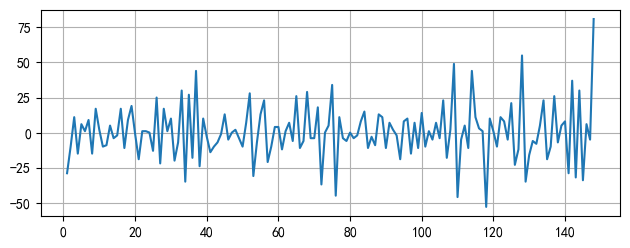

6004020503_一阶差分差分后的ADF检验结果:
ADF统计量: -6.966944
p值: 0.000000
临界值:
	1%: -3.478
	5%: -2.882
	10%: -2.578

结论: 在显著性水平0.05下，拒绝原假设，6004020503_一阶差分差分后序列是平稳的。


物料 6004020918 的差分处理结果：
6004020918_一阶差分的阶差分结果:
差分前数据长度: 157
差分后数据长度: 156


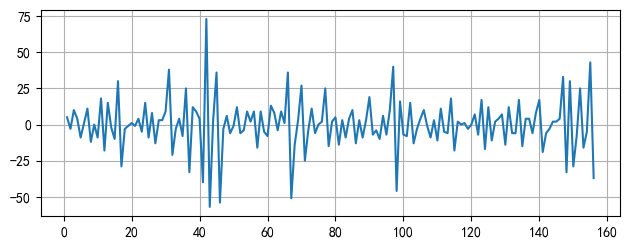

6004020918_一阶差分差分后的ADF检验结果:
ADF统计量: -16.683159
p值: 0.000000
临界值:
	1%: -3.474
	5%: -2.880
	10%: -2.577

结论: 在显著性水平0.05下，拒绝原假设，6004020918_一阶差分差分后序列是平稳的。


物料 6004010256 的差分处理结果：
6004010256_一阶差分的阶差分结果:
差分前数据长度: 150
差分后数据长度: 149


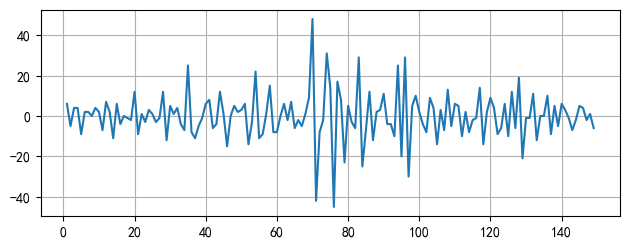

6004010256_一阶差分差分后的ADF检验结果:
ADF统计量: -12.231401
p值: 0.000000
临界值:
	1%: -3.476
	5%: -2.882
	10%: -2.578

结论: 在显著性水平0.05下，拒绝原假设，6004010256_一阶差分差分后序列是平稳的。


物料 6004010372 的差分处理结果：
6004010372_一阶差分的阶差分结果:
差分前数据长度: 20
差分后数据长度: 19


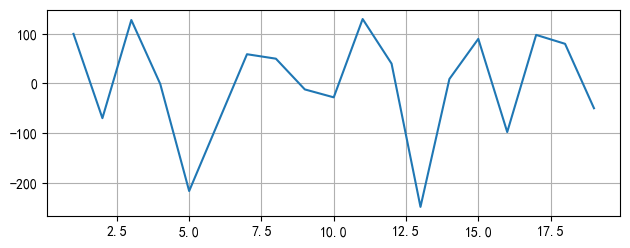

6004010372_一阶差分差分后的ADF检验结果:
ADF统计量: -5.525594
p值: 0.000002
临界值:
	1%: -4.069
	5%: -3.127
	10%: -2.702

结论: 在显著性水平0.05下，拒绝原假设，6004010372_一阶差分差分后序列是平稳的。


物料 6004020900 的差分处理结果：
6004020900_一阶差分的阶差分结果:
差分前数据长度: 119
差分后数据长度: 118


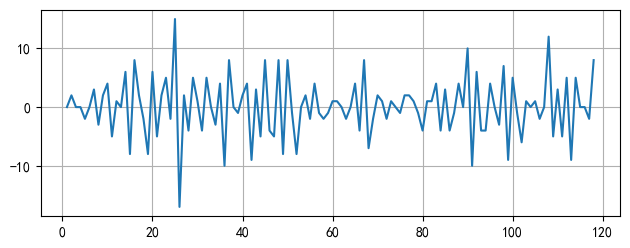

6004020900_一阶差分差分后的ADF检验结果:
ADF统计量: -7.456857
p值: 0.000000
临界值:
	1%: -3.491
	5%: -2.888
	10%: -2.581

结论: 在显著性水平0.05下，拒绝原假设，6004020900_一阶差分差分后序列是平稳的。


物料 6004010174 的差分处理结果：
6004010174_一阶差分的阶差分结果:
差分前数据长度: 113
差分后数据长度: 112


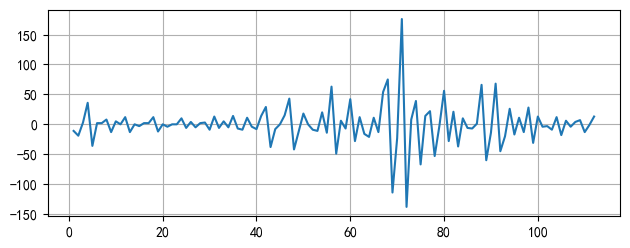

6004010174_一阶差分差分后的ADF检验结果:
ADF统计量: -7.924952
p值: 0.000000
临界值:
	1%: -3.493
	5%: -2.889
	10%: -2.581

结论: 在显著性水平0.05下，拒绝原假设，6004010174_一阶差分差分后序列是平稳的。




In [29]:
# 定义差分函数
def diff_function(timeseries, diff_order=1, title=''):
    """
    对时间序列进行差分处理
    
    参数:
    timeseries: 时间序列数据
    diff_order: 差分阶数，默认为1（一阶差分）
    title: 数据标题，用于输出结果
    
    返回:
    差分后的时间序列
    """
    # 进行差分处理
    diff_data = timeseries.diff(diff_order).dropna()
    
    print(f"{title}的阶差分结果:")
    print(f"差分前数据长度: {len(timeseries)}")
    print(f"差分后数据长度: {len(diff_data)}")
    
    # 绘制差分后的时间序列图
    
    plt.subplot(212)
    plt.plot(diff_data)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'F:\\vscode_code\\2022E\\results\\{title}差分图.png', dpi=350)
    plt.show()
    
    # 检验差分后的平稳性
    result = adfuller(diff_data.dropna())
    print(f"{title}差分后的ADF检验结果:")
    print('ADF统计量: %f' % result[0])
    print('p值: %f' % result[1])
    print('临界值:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    # 判断结果
    if result[1] <= 0.05:
        print(f"\n结论: 在显著性水平0.05下，拒绝原假设，{title}差分后序列是平稳的。")
    else:
        print(f"\n结论: 在显著性水平0.05下，不能拒绝原假设，{title}差分后序列是非平稳的。")
    
    return diff_data

# 对六个重点物料进行差分处理
for material in key_materials:
    material_data = df[df['物料编码'] == material]
    if material_data.empty:
        continue
    # 按周聚合需求量
    weekly_data = material_data.groupby('周')['需求量'].sum().reset_index()
    print(f"物料 {material} 的差分处理结果：")
    diffed_data = diff_function(weekly_data['需求量'], diff_order=1, title=f"{material}_一阶差分")
    print("\n")

In [30]:
# 检验一阶差分后的数据是否为白噪声
# 对六个重点物料的一阶差分数据进行白噪声检验
for material in key_materials:
    material_data = df[df['物料编码'] == material]
    if material_data.empty:
        continue
    # 按周聚合需求量
    weekly_data = material_data.groupby('周')['需求量'].sum().reset_index()
    print(f"物料 {material} 的一阶差分白噪声检验结果：")
    white_noise_test(diffed_data)
    print("\n")

物料 6004020503 的一阶差分白噪声检验结果：
Ljung-Box检验结果:
     lb_stat     lb_pvalue
10  83.96745  8.339840e-14


物料 6004020918 的一阶差分白噪声检验结果：
Ljung-Box检验结果:
     lb_stat     lb_pvalue
10  83.96745  8.339840e-14


物料 6004010256 的一阶差分白噪声检验结果：
Ljung-Box检验结果:
     lb_stat     lb_pvalue
10  83.96745  8.339840e-14


物料 6004010372 的一阶差分白噪声检验结果：
Ljung-Box检验结果:
     lb_stat     lb_pvalue
10  83.96745  8.339840e-14


物料 6004020900 的一阶差分白噪声检验结果：
Ljung-Box检验结果:
     lb_stat     lb_pvalue
10  83.96745  8.339840e-14


物料 6004010174 的一阶差分白噪声检验结果：
Ljung-Box检验结果:
     lb_stat     lb_pvalue
10  83.96745  8.339840e-14




开始处理 6 个重点物料...

正在处理物料 6004020503...
物料 6004020503 的数据点数量: 149


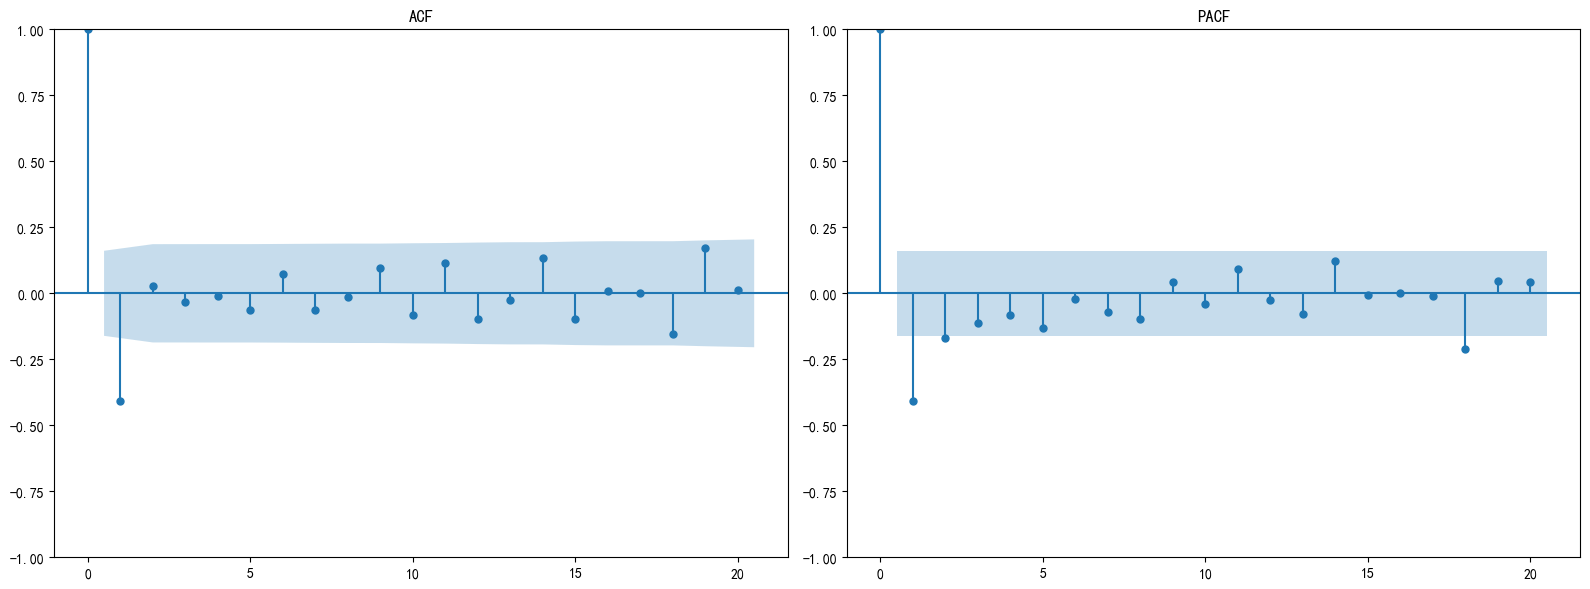

根据ACF和PACF图的初步判断：
p = 2, q = 1

使用AIC和BIC准则进行网格搜索以确定最佳参数...
ARIMA(0,1,1) - AIC:1243.5578, BIC:1249.5522
ARIMA(0,1,2) - AIC:1242.3353, BIC:1251.3270
ARIMA(0,1,3) - AIC:1241.7333, BIC:1253.7221
ARIMA(1,1,0) - AIC:1267.2465, BIC:1273.2409
ARIMA(1,1,1) - AIC:1241.0992, BIC:1250.0909
ARIMA(1,1,2) - AIC:1241.1419, BIC:1253.1307
ARIMA(1,1,3) - AIC:1246.1101, BIC:1261.0962
ARIMA(2,1,0) - AIC:1261.5140, BIC:1270.5057
ARIMA(2,1,1) - AIC:1240.9701, BIC:1252.9589
ARIMA(2,1,2) - AIC:1242.9059, BIC:1257.8919
ARIMA(2,1,3) - AIC:1244.8896, BIC:1262.8728
ARIMA(3,1,0) - AIC:1259.1220, BIC:1271.1109
ARIMA(3,1,1) - AIC:1242.9086, BIC:1257.8947
ARIMA(3,1,2) - AIC:1244.8723, BIC:1262.8556
ARIMA(3,1,3) - AIC:1246.6722, BIC:1267.6527

前10个最佳模型（按AIC排序）:
    p  q          AIC          BIC
8   2  1  1240.970058  1252.958907
4   1  1  1241.099217  1250.090854
5   1  2  1241.141882  1253.130732
2   0  3  1241.733284  1253.722133
1   0  2  1242.335322  1251.326959
9   2  2  1242.905863  1257.891925
12  3  1  1242.9

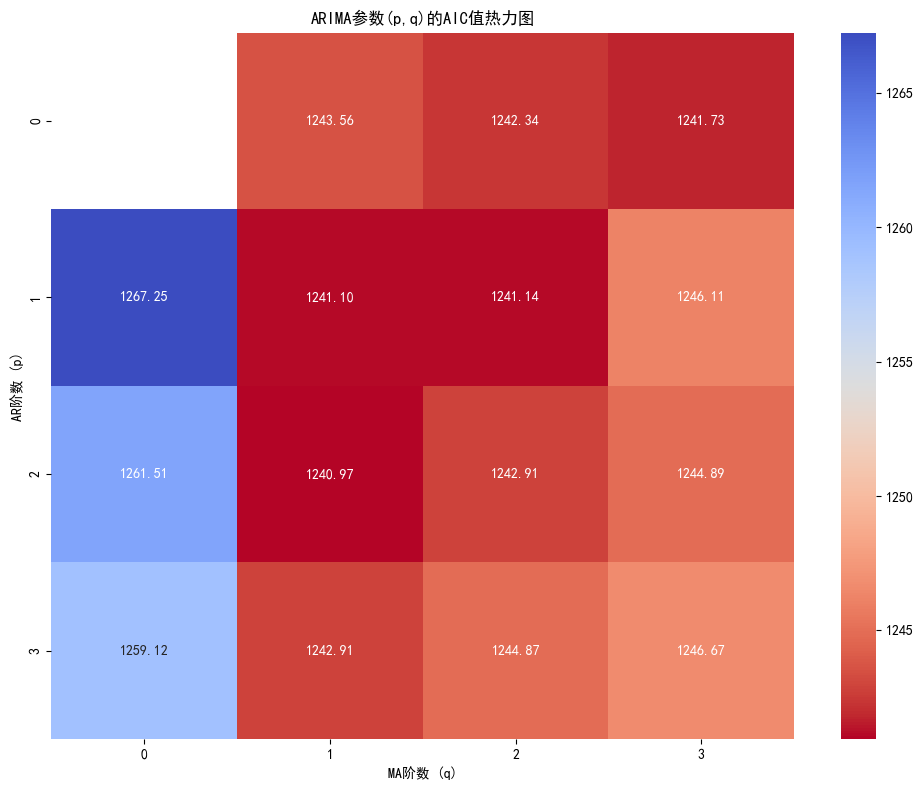


基于AIC的最佳ARIMA模型: ARIMA(2,1,1)
AIC值: 1240.9701

基于BIC的最佳ARIMA模型: ARIMA(0,1,1)
BIC值: 1249.5522

AIC和BIC选择了不同的模型参数
BIC通常倾向于更简约的模型，而AIC可能选择更复杂的模型
物料 6004020503 成功确定ARIMA参数

正在处理物料 6004020918...
物料 6004020918 的数据点数量: 157


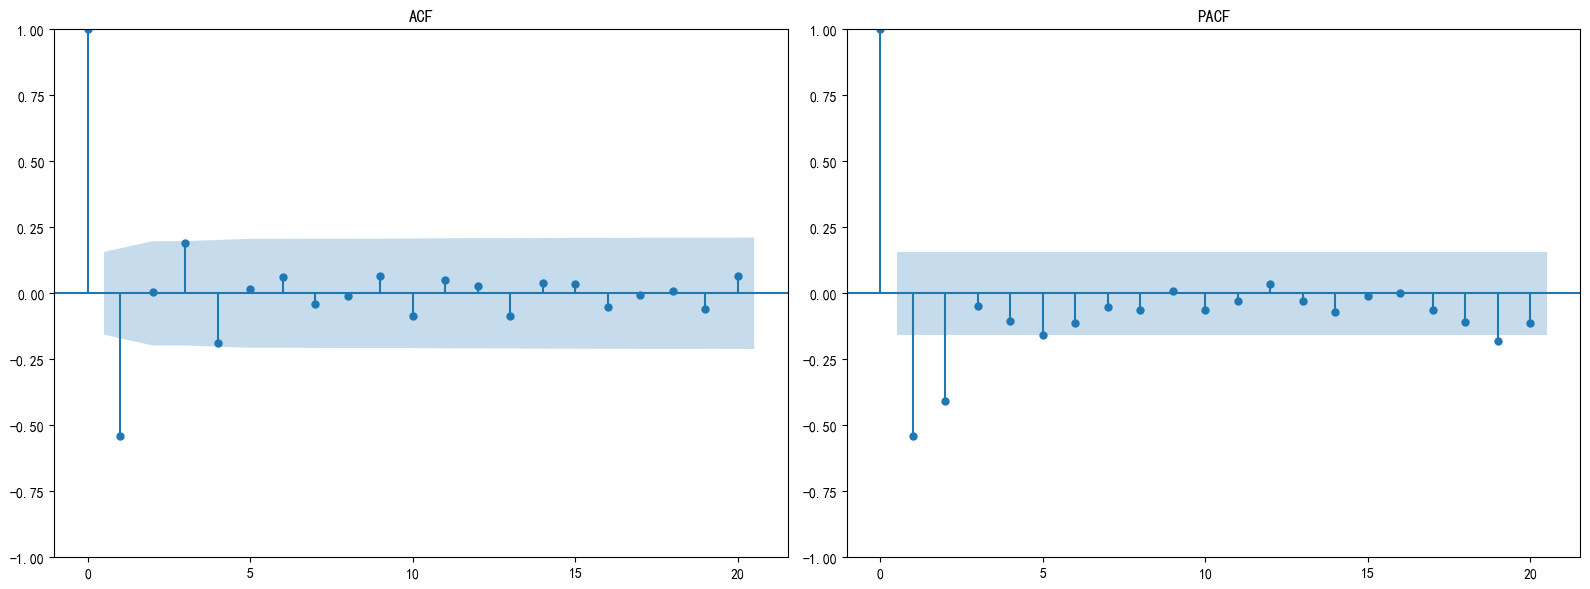

根据ACF和PACF图的初步判断：
p = 2, q = 1

使用AIC和BIC准则进行网格搜索以确定最佳参数...
ARIMA(0,1,1) - AIC:1255.8092, BIC:1261.9089
ARIMA(0,1,2) - AIC:1256.6059, BIC:1265.7555
ARIMA(0,1,3) - AIC:1257.5798, BIC:1269.7792
ARIMA(1,1,0) - AIC:1284.5738, BIC:1290.6735
ARIMA(1,1,1) - AIC:1256.4765, BIC:1265.6261
ARIMA(1,1,2) - AIC:1258.4764, BIC:1270.6758
ARIMA(1,1,3) - AIC:1259.5615, BIC:1274.8108
ARIMA(2,1,0) - AIC:1258.2482, BIC:1267.3978
ARIMA(2,1,1) - AIC:1258.4749, BIC:1270.6744
ARIMA(2,1,2) - AIC:1258.2074, BIC:1273.4567
ARIMA(2,1,3) - AIC:1256.3833, BIC:1274.6825
ARIMA(3,1,0) - AIC:1260.0394, BIC:1272.2388
ARIMA(3,1,1) - AIC:1249.4846, BIC:1264.7339
ARIMA(3,1,2) - AIC:1250.9254, BIC:1269.2245
ARIMA(3,1,3) - AIC:1252.7112, BIC:1274.0602

前10个最佳模型（按AIC排序）:
    p  q          AIC          BIC
12  3  1  1249.484580  1264.733860
13  3  2  1250.925380  1269.224516
14  3  3  1252.711210  1274.060202
0   0  1  1255.809150  1261.908862
10  2  3  1256.383322  1274.682458
4   1  1  1256.476530  1265.626098
1   0  2  1256.6

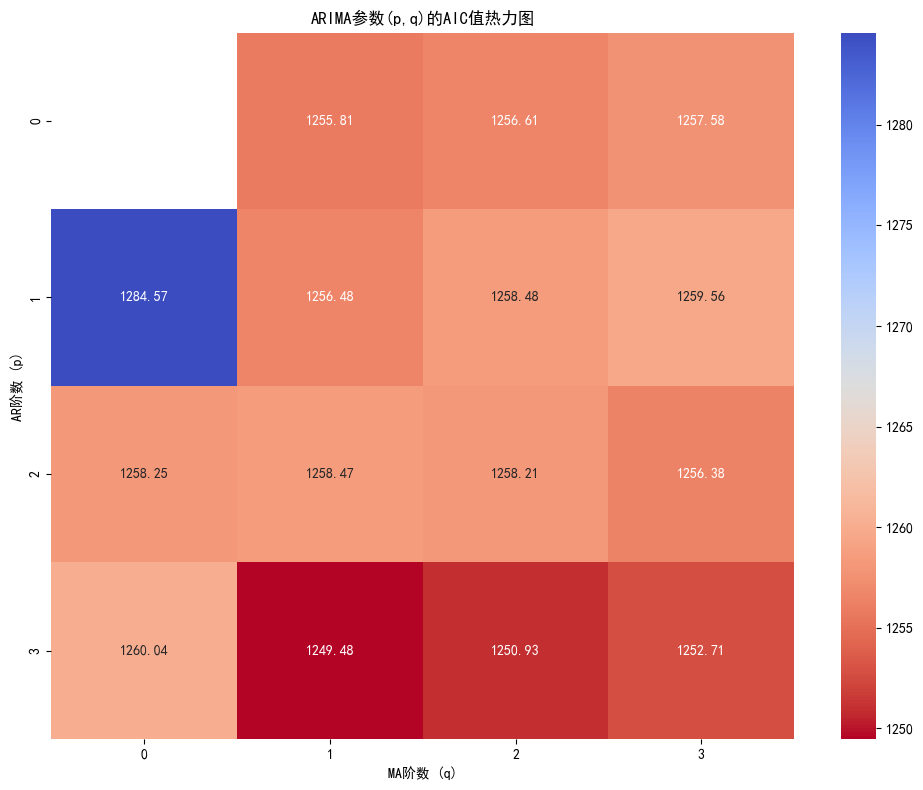


基于AIC的最佳ARIMA模型: ARIMA(3,1,1)
AIC值: 1249.4846

基于BIC的最佳ARIMA模型: ARIMA(0,1,1)
BIC值: 1261.9089

AIC和BIC选择了不同的模型参数
BIC通常倾向于更简约的模型，而AIC可能选择更复杂的模型
物料 6004020918 成功确定ARIMA参数

正在处理物料 6004010256...
物料 6004010256 的数据点数量: 150


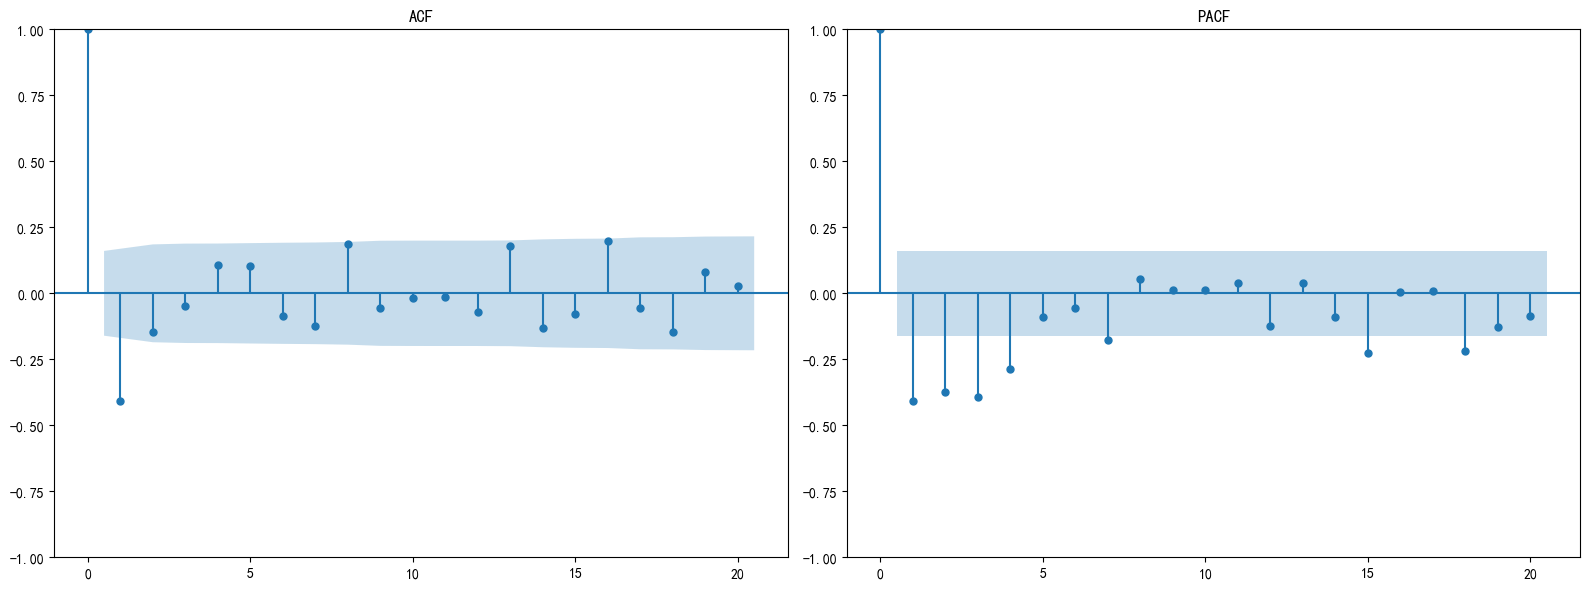

根据ACF和PACF图的初步判断：
p = 3, q = 1

使用AIC和BIC准则进行网格搜索以确定最佳参数...
ARIMA(0,1,1) - AIC:1078.8701, BIC:1084.8780
ARIMA(0,1,2) - AIC:1080.6111, BIC:1089.6230
ARIMA(0,1,3) - AIC:1079.8531, BIC:1091.8689
ARIMA(1,1,0) - AIC:1133.9023, BIC:1139.9102
ARIMA(1,1,1) - AIC:1080.6941, BIC:1089.7059
ARIMA(1,1,2) - AIC:1082.8152, BIC:1094.8310
ARIMA(1,1,3) - AIC:1081.7804, BIC:1096.8002
ARIMA(2,1,0) - AIC:1113.5829, BIC:1122.5947
ARIMA(2,1,1) - AIC:1078.8893, BIC:1090.9051
ARIMA(2,1,2) - AIC:1079.0863, BIC:1094.1060
ARIMA(2,1,3) - AIC:1077.5932, BIC:1095.6169
ARIMA(3,1,0) - AIC:1090.7216, BIC:1102.7374
ARIMA(3,1,1) - AIC:1077.5519, BIC:1092.5716
ARIMA(3,1,2) - AIC:1079.4473, BIC:1097.4709
ARIMA(3,1,3) - AIC:1078.9360, BIC:1099.9636

前10个最佳模型（按AIC排序）:
    p  q          AIC          BIC
12  3  1  1077.551888  1092.571620
10  2  3  1077.593246  1095.616924
0   0  1  1078.870134  1084.878026
8   2  1  1078.889314  1090.905100
14  3  3  1078.936024  1099.963648
9   2  2  1079.086286  1094.106017
13  3  2  1079.4

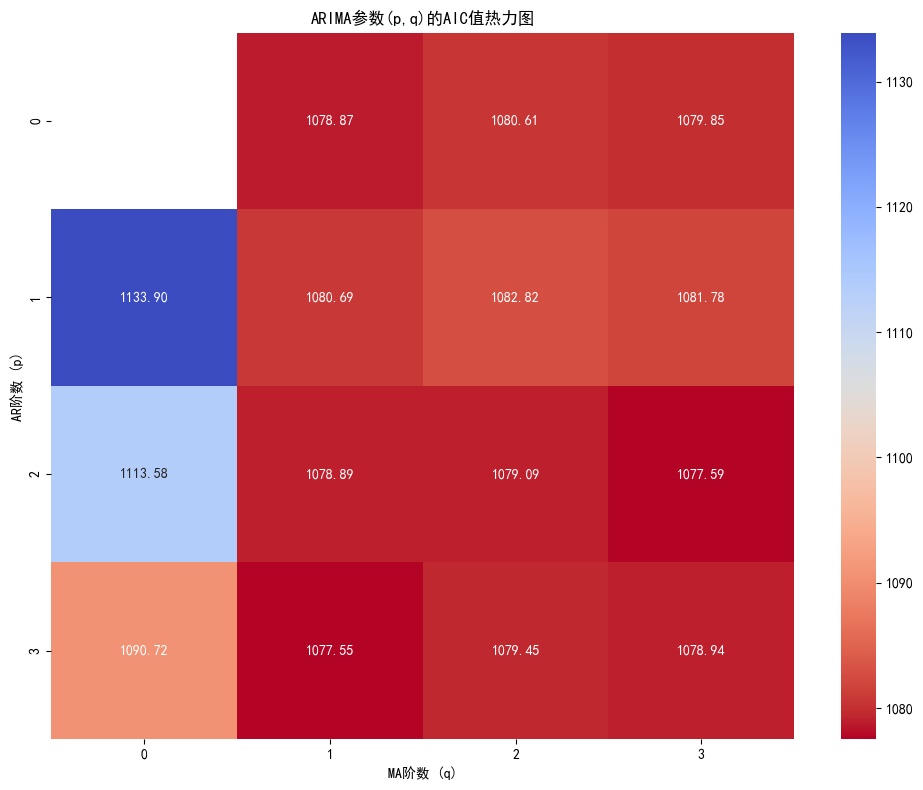


基于AIC的最佳ARIMA模型: ARIMA(3,1,1)
AIC值: 1077.5519

基于BIC的最佳ARIMA模型: ARIMA(0,1,1)
BIC值: 1084.8780

AIC和BIC选择了不同的模型参数
BIC通常倾向于更简约的模型，而AIC可能选择更复杂的模型
物料 6004010256 成功确定ARIMA参数

正在处理物料 6004010372...
物料 6004010372 的数据点数量: 20
处理物料 6004010372 时出错: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 12 must be < 9.

正在处理物料 6004020900...
物料 6004020900 的数据点数量: 119


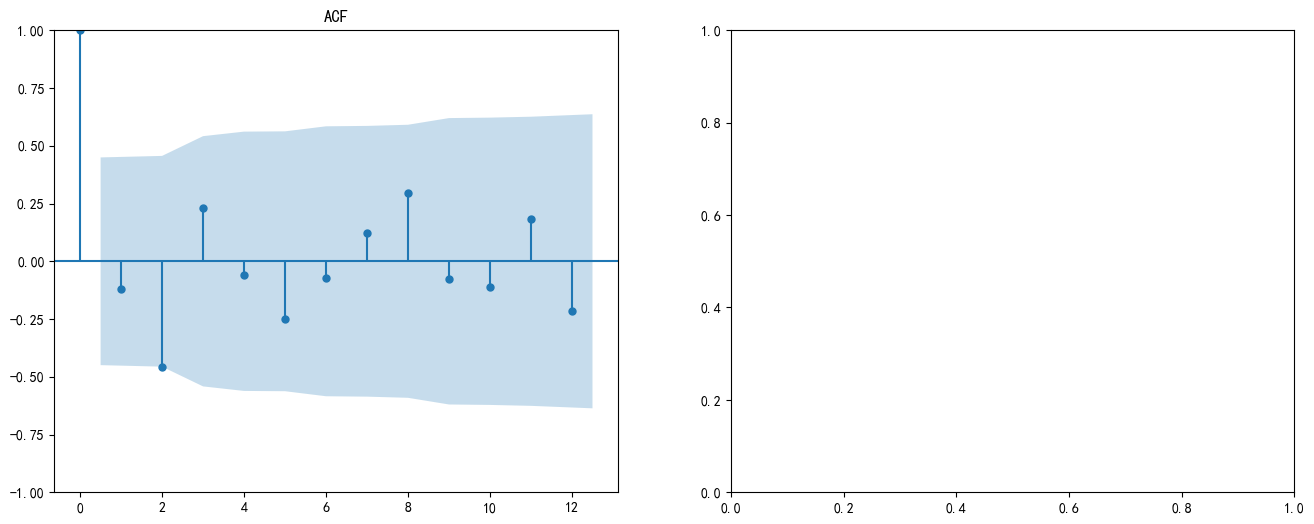

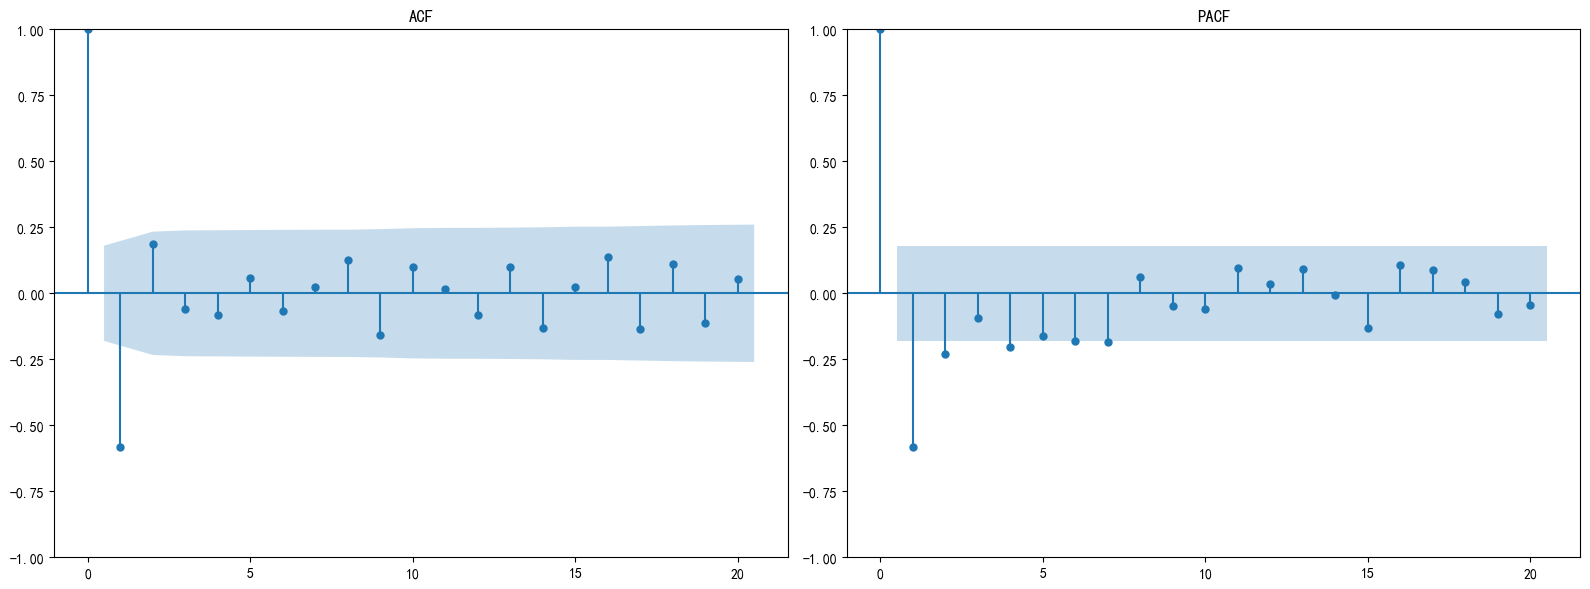

根据ACF和PACF图的初步判断：
p = 2, q = 2

使用AIC和BIC准则进行网格搜索以确定最佳参数...
ARIMA(0,1,1) - AIC:649.0508, BIC:654.5922
ARIMA(0,1,2) - AIC:650.3454, BIC:658.6575
ARIMA(0,1,3) - AIC:649.2052, BIC:660.2880
ARIMA(1,1,0) - AIC:666.2812, BIC:671.8226
ARIMA(1,1,1) - AIC:650.0962, BIC:658.4082
ARIMA(1,1,2) - AIC:651.1971, BIC:662.2798
ARIMA(1,1,3) - AIC:651.1834, BIC:665.0368
ARIMA(2,1,0) - AIC:661.3225, BIC:669.6345
ARIMA(2,1,1) - AIC:650.0500, BIC:661.1327
ARIMA(2,1,2) - AIC:652.0326, BIC:665.8860
ARIMA(2,1,3) - AIC:653.6832, BIC:670.3073
ARIMA(3,1,0) - AIC:662.0890, BIC:673.1718
ARIMA(3,1,1) - AIC:651.9944, BIC:665.8478
ARIMA(3,1,2) - AIC:653.8658, BIC:670.4899
ARIMA(3,1,3) - AIC:650.6449, BIC:670.0396

前10个最佳模型（按AIC排序）:
    p  q         AIC         BIC
0   0  1  649.050805  654.592174
2   0  3  649.205222  660.287961
8   2  1  650.049965  661.132703
4   1  1  650.096154  658.408208
1   0  2  650.345445  658.657499
14  3  3  650.644858  670.039650
6   1  3  651.183401  665.036824
5   1  2  651.197052  662.2

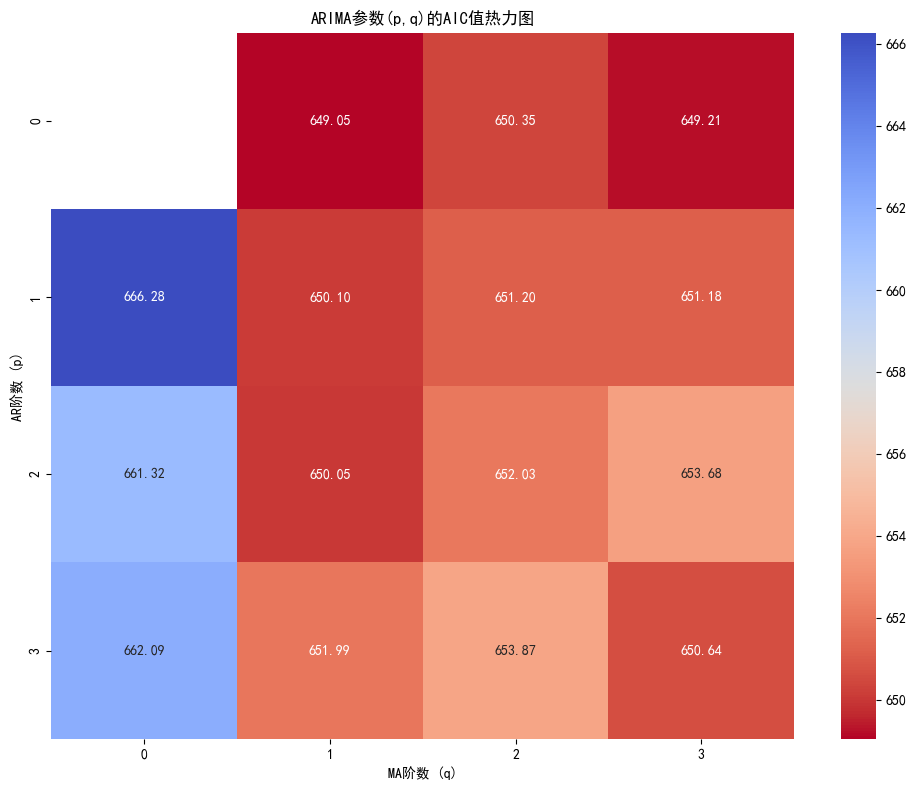


基于AIC的最佳ARIMA模型: ARIMA(0,1,1)
AIC值: 649.0508

基于BIC的最佳ARIMA模型: ARIMA(0,1,1)
BIC值: 654.5922

AIC和BIC选择了相同的模型参数
物料 6004020900 成功确定ARIMA参数

正在处理物料 6004010174...
物料 6004010174 的数据点数量: 113


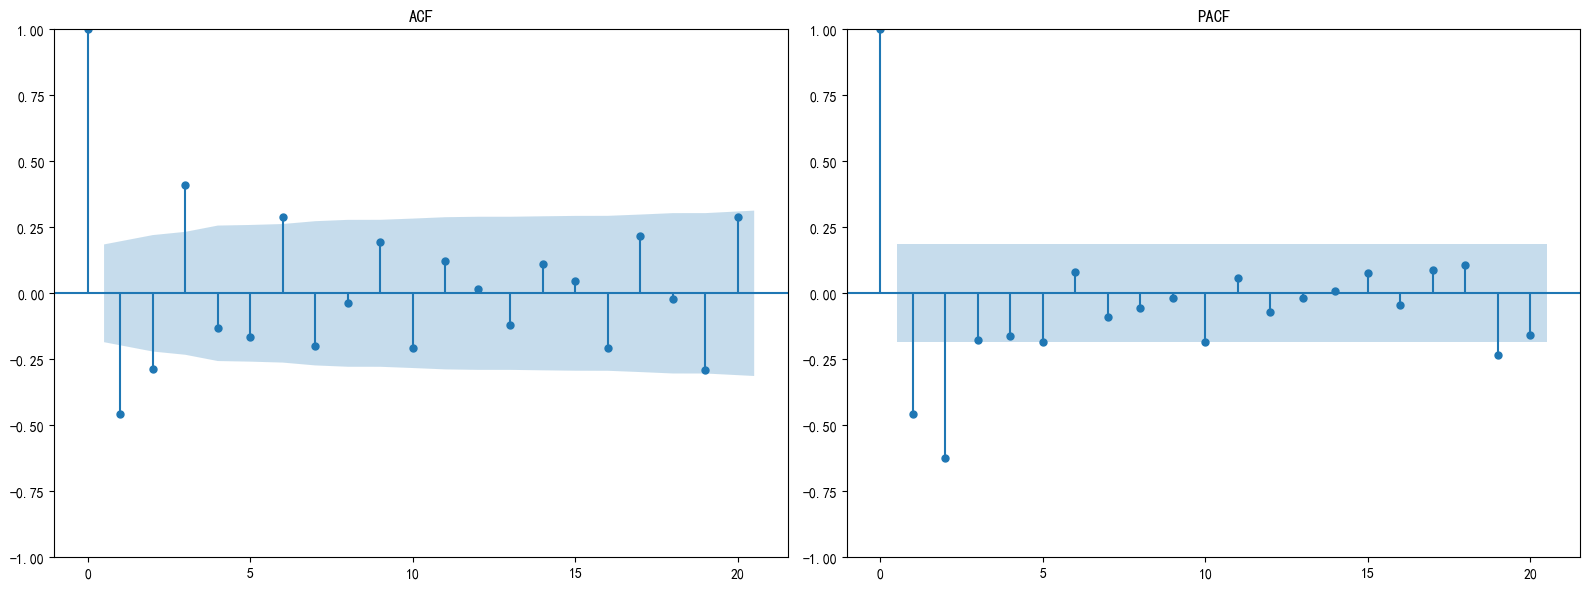

根据ACF和PACF图的初步判断：
p = 3, q = 3

使用AIC和BIC准则进行网格搜索以确定最佳参数...
ARIMA(0,1,1) - AIC:1039.5709, BIC:1045.0079
ARIMA(0,1,2) - AIC:1037.4557, BIC:1045.6112
ARIMA(0,1,3) - AIC:1034.2181, BIC:1045.0921
ARIMA(1,1,0) - AIC:1085.9185, BIC:1091.3555
ARIMA(1,1,1) - AIC:1039.6827, BIC:1047.8382
ARIMA(1,1,2) - AIC:1041.4365, BIC:1052.3105
ARIMA(1,1,3) - AIC:1032.8329, BIC:1046.4254
ARIMA(2,1,0) - AIC:1032.5126, BIC:1040.6681
ARIMA(2,1,1) - AIC:1026.5570, BIC:1037.4310
ARIMA(2,1,2) - AIC:1026.8699, BIC:1040.4624
ARIMA(2,1,3) - AIC:1026.9169, BIC:1043.2279
ARIMA(3,1,0) - AIC:1030.5357, BIC:1041.4097
ARIMA(3,1,1) - AIC:1026.3077, BIC:1039.9002
ARIMA(3,1,2) - AIC:1028.2887, BIC:1044.5997
ARIMA(3,1,3) - AIC:1026.3219, BIC:1045.3514

前10个最佳模型（按AIC排序）:
    p  q          AIC          BIC
12  3  1  1026.307678  1039.900172
14  3  3  1026.321907  1045.351399
8   2  1  1026.557000  1037.430996
9   2  2  1026.869945  1040.462439
10  2  3  1026.916924  1043.227918
13  3  2  1028.288724  1044.599717
11  3  0  1030.5

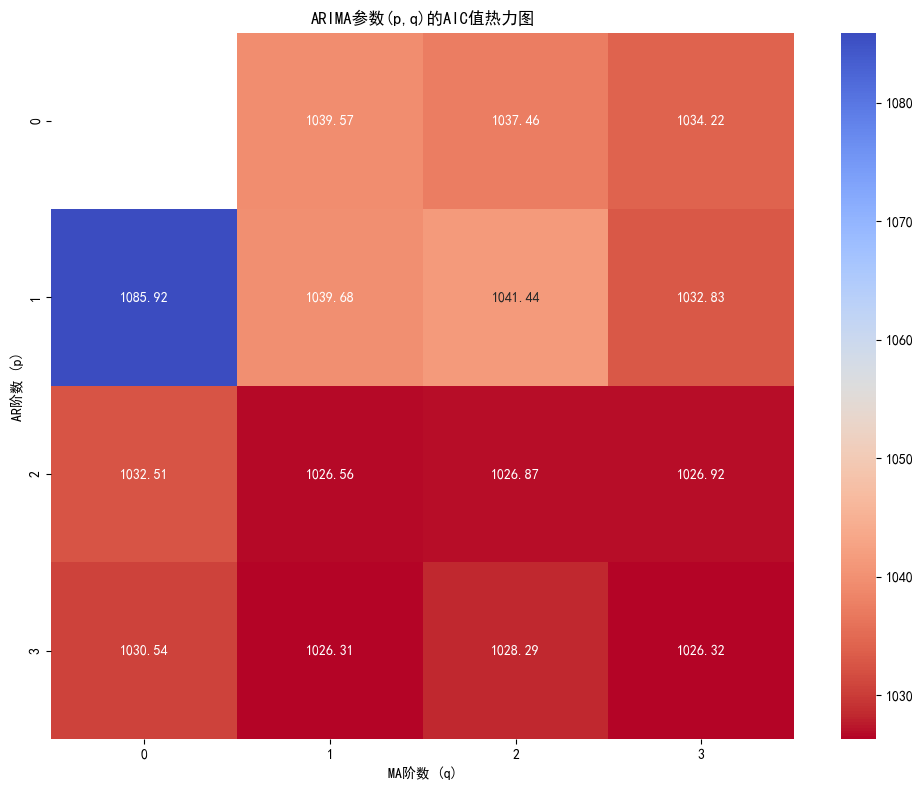


基于AIC的最佳ARIMA模型: ARIMA(3,1,1)
AIC值: 1026.3077

基于BIC的最佳ARIMA模型: ARIMA(2,1,1)
BIC值: 1037.4310

AIC和BIC选择了不同的模型参数
BIC通常倾向于更简约的模型，而AIC可能选择更复杂的模型
物料 6004010174 成功确定ARIMA参数

成功处理的物料数量: 6

最终确定的ARIMA模型参数：
            p  d  q          BIC
6004020503  0  1  1  1249.552199
6004020918  0  1  1  1261.908862
6004010256  0  1  1  1084.878026
6004010372  1  1  1          inf
6004020900  0  1  1   654.592174
6004010174  2  1  1  1037.430996


In [31]:

from itertools import product
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

def determine_arima_orders(data, d=1, max_p=3, max_q=3):
    """
    通过ACF和PACF图确定ARIMA模型的阶数
    
    参数:
    data: 时间序列数据
    d: 差分阶数，默认为1
    max_p, max_q: AR和MA阶数的最大值
    
    返回:
    推荐的p, q值和对应的AIC值以及BIC值
    """
    # 进行差分处理
    diff_data = data.copy()
    # 差分
    for i in range(d):
        diff_data = diff_data.diff().dropna()
    
    # 计算最大可用滞后阶数（不超过样本大小的70%）
    max_lags = min(20, int(len(diff_data) * 0.7) - 1)
    
    # 绘制ACF和PACF图
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # ACF
    plot_acf(diff_data, lags=max_lags, ax=axes[0])
    axes[0].set_title('ACF')
    
    # PACF
    plot_pacf(diff_data, lags=max_lags, ax=axes[1])
    axes[1].set_title('PACF')
    plt.savefig(f'F:\\vscode_code\\2022E\\results\\ACFandPACF_ARIMA.png')
    plt.tight_layout()
    plt.show()
    
    # 根据ACF和PACF图进行初步判断
    acf_values = acf(diff_data, nlags=max_lags)
    pacf_values = pacf(diff_data, nlags=max_lags)
    
    # 计算显著性界限
    significance_level = 1.96/np.sqrt(len(diff_data))
    
    # 判断ACF的截尾情况
    q_suggested = 0
    for i in range(1, min(max_q + 1, len(acf_values))):
        if abs(acf_values[i]) > significance_level:
            q_suggested = i
        else:
            break
    
    # 判断PACF的截尾情况
    p_suggested = 0
    for i in range(1, min(max_p + 1, len(pacf_values))):
        if abs(pacf_values[i]) > significance_level:
            p_suggested = i
        else:
            break

    print(f"根据ACF和PACF图的初步判断：")
    print(f"p = {p_suggested}, q = {q_suggested}")
    
    # 使用网格搜索找到最佳参数
    print("\n使用AIC和BIC准则进行网格搜索以确定最佳参数...")
    
    # 设置参数范围
    p_range = range(0, max_p + 1)
    q_range = range(0, max_q + 1)
    
    best_aic = float('inf')
    best_bic = float('inf')
    best_params_aic = None
    best_params_bic = None
    results = []
    
    # 网格搜索
    for p, q in product(p_range, q_range):
        # 跳过p=q=0的情况
        if p == 0 and q == 0:
            continue
            
        try:
            model = ARIMA(data, order=(p, d, q))
            model_fit = model.fit()
            aic = model_fit.aic
            bic = model_fit.bic
            
            # 记录结果
            results.append([p, q, aic, bic])
            
            # 更新最佳AIC参数
            if aic < best_aic:
                best_aic = aic
                best_params_aic = (p, d, q)
                
            # 更新最佳BIC参数
            if bic < best_bic:
                best_bic = bic
                best_params_bic = (p, d, q)
                
            print(f'ARIMA({p},{d},{q}) - AIC:{aic:.4f}, BIC:{bic:.4f}')
        except:
            continue
    
    # 将结果转换为DataFrame并排序
    results_df = pd.DataFrame(results, columns=['p', 'q', 'AIC', 'BIC'])
    
    # 显示前10个最佳模型（按AIC排序）
    print("\n前10个最佳模型（按AIC排序）:")
    print(results_df.sort_values('AIC').head(10))
    
    # 显示前10个最佳模型（按BIC排序）
    print("\n前10个最佳模型（按BIC排序）:")
    print(results_df.sort_values('BIC').head(10))
    
    # 绘制热力图
    if len(results_df) > 0:
        try:
            import seaborn as sns
            
            # 创建热力图
            plt.figure(figsize=(10, 8))
            pivot_table = results_df.pivot_table(
                index='p', columns='q', values='AIC', aggfunc='mean'
            )
            sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='coolwarm_r')
            plt.title('ARIMA参数(p,q)的AIC值热力图')
            plt.xlabel('MA阶数 (q)')
            plt.ylabel('AR阶数 (p)')
            
            plt.savefig(f'F:\\vscode_code\\2022E\\results\\ARIMA热力图.png')
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"绘制热力图时出错: {e}")
    
    # 返回最佳参数
    if best_params_aic and best_params_bic:
        p_aic, d_aic, q_aic = best_params_aic
        p_bic, d_bic, q_bic = best_params_bic
        
        print(f"\n基于AIC的最佳ARIMA模型: ARIMA({p_aic},{d_aic},{q_aic})")
        print(f"AIC值: {best_aic:.4f}")
        
        print(f"\n基于BIC的最佳ARIMA模型: ARIMA({p_bic},{d_bic},{q_bic})")
        print(f"BIC值: {best_bic:.4f}")
        
        # 比较AIC和BIC选择的模型
        if best_params_aic == best_params_bic:
            print("\nAIC和BIC选择了相同的模型参数")
        else:
            print("\nAIC和BIC选择了不同的模型参数")
            print("BIC通常倾向于更简约的模型，而AIC可能选择更复杂的模型")
        
        return p_aic, q_aic, best_aic, p_bic, q_bic, best_bic
    else:
        print("\n未找到合适的模型")
        return None

def get_final_arima_parameters(df, key_materials):
    """
    为每个重点物料确定最终的ARIMA模型参数
    
    参数:
    df: 原始数据框
    key_materials: 重点物料列表
    
    返回:
    字典，包含每个物料的最终ARIMA参数
    """
    final_parameters = {}
    
    print(f"开始处理 {len(key_materials)} 个重点物料...")
    
    for material in key_materials:
        print(f"\n正在处理物料 {material}...")
        
        # 获取该物料的数据
        material_data = df[df['物料编码'] == material]
        if material_data.empty:
            print(f"警告：物料 {material} 没有数据")
            continue
            
        # 按周聚合需求量
        weekly_data = material_data.groupby('周')['需求量'].sum()
        print(f"物料 {material} 的数据点数量: {len(weekly_data)}")
        
        try:
            # 调用之前定义的determine_arima_orders函数
            result = determine_arima_orders(weekly_data)
            
            if result is not None:
                p_aic, q_aic, best_aic, p_bic, q_bic, best_bic = result
                
                # 选择BIC标准的参数（因为BIC倾向于更简约的模型）
                final_parameters[material] = {
                    'p': p_bic,
                    'd': 1,  # 根据之前的分析，大多数序列需要一阶差分
                    'q': q_bic,
                    'BIC': best_bic
                }
                print(f"物料 {material} 成功确定ARIMA参数")
            else:
                print(f"物料 {material} 未能找到合适的ARIMA参数")
                # 使用默认参数
                final_parameters[material] = {
                    'p': 1,
                    'd': 1,
                    'q': 1,
                    'BIC': float('inf')
                }
                
        except Exception as e:
            print(f"处理物料 {material} 时出错: {str(e)}")
            # 使用默认参数
            final_parameters[material] = {
                'p': 1,
                'd': 1,
                'q': 1,
                'BIC': float('inf')
            }
            
    print(f"\n成功处理的物料数量: {len(final_parameters)}")
    return final_parameters

# 使用函数获取最终参数
final_arima_params = get_final_arima_parameters(df, key_materials)

# 将结果保存为更易读的格式
final_models = pd.DataFrame.from_dict(final_arima_params, orient='index')
print("\n最终确定的ARIMA模型参数：")
print(final_models)

# 保存结果到CSV文件
final_models.to_csv(r'F:\vscode_code\2022E\results\data_csv\ARIMA模型最终参数.csv')

In [32]:
def perform_arima_diagnostics(df, key_materials, final_parameters):
    """
    对每个物料的ARIMA模型进行诊断
    
    参数:
    df: DataFrame, 原始数据
    key_materials: list, 重点物料列表
    final_parameters: dict, 每个物料的ARIMA参数
    """
    import statsmodels.api as sm
    from scipy import stats
    
    print(f"开始诊断 {len(key_materials)} 个物料的ARIMA模型...")
    print(f"物料列表: {key_materials}")
    
    for material in key_materials:
        print(f"\n{'='*50}")
        print(f"正在进行物料 {material} 的ARIMA模型诊断...")
        
        try:
            # 获取该物料的数据
            material_data = df[df['物料编码'] == material]
            if material_data.empty:
                print(f"警告：物料 {material} 没有数据")
                continue
            
            # 按周聚合需求量
            weekly_data = material_data.groupby('周')['需求量'].sum()
            print(f"数据点数量: {len(weekly_data)}")
            
            # 检查数据点数量是否足够
            if len(weekly_data) < 30:  # 如果数据点少于30个
                print(f"警告：物料 {material} 的数据点数量过少（{len(weekly_data)} < 30），可能影响模型可靠性")
            
            # 获取该物料的ARIMA参数
            params = final_parameters[material]
            p, d, q = params['p'], params['d'], params['q']
            print(f"ARIMA参数: p={p}, d={d}, q={q}")
            
            # 拟合ARIMA模型
            model = sm.tsa.ARIMA(weekly_data, order=(p, d, q))
            results = model.fit()
            
            # 创建诊断图
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
            
            # 残差图
            ax1.plot(results.resid)
            ax1.set_title('残差图')
            ax1.set_xlabel('观测点')
            ax1.set_ylabel('残差')
            
            # 残差自相关图 - 根据数据点数量调整滞后阶数
            max_lags = min(40, len(weekly_data) - 1)
            sm.graphics.tsa.plot_acf(results.resid, lags=max_lags, ax=ax2)
            ax2.set_title('残差自相关图')
            
            # 残差直方图
            results.resid.hist(ax=ax3, bins=min(30, len(weekly_data)), density=True)
            xmin, xmax = ax3.get_xlim()
            x = np.linspace(xmin, xmax, 100)
            p_norm = stats.norm.pdf(x, np.mean(results.resid), np.std(results.resid))
            ax3.plot(x, p_norm, 'k', linewidth=2)
            ax3.set_title('残差直方图（带正态分布拟合曲线）')
            
            # QQ图
            stats.probplot(results.resid, dist="norm", plot=ax4)
            ax4.set_title('残差QQ图')
            
            # 保存图像
            plt.tight_layout()
            save_path = f'F:\\vscode_code\\2022E\\results\\{material}_ARIMA诊断图.png'
            plt.savefig(save_path)
            plt.close()
            print(f"诊断图已保存至: {save_path}")
            
            # 进行统计检验
            dw_test = sm.stats.stattools.durbin_watson(results.resid)
            stat, p_value = stats.normaltest(results.resid)
            
            print("\n模型诊断结果:")
            print(f"Durbin-Watson检验值: {dw_test:.4f}")
            if 1.5 <= dw_test <= 2.5:
                print("残差不存在自相关性")
            else:
                print("残差可能存在自相关性")
                
            print(f"残差正态性检验 p值: {p_value:.4f}")
            if p_value > 0.05:
                print("残差服从正态分布")
            else:
                print("残差不服从正态分布")
            
        except Exception as e:
            print(f"错误：物料 {material} 的诊断过程失败")
            print(f"错误信息: {str(e)}")
            print(f"错误类型: {type(e).__name__}")
            import traceback
            print("详细错误追踪:")
            print(traceback.format_exc())
            
        print(f"{'='*50}\n")

# 执行诊断
print("\n最终参数:", final_arima_params)
perform_arima_diagnostics(df, key_materials, final_arima_params)



最终参数: {6004020503: {'p': 0, 'd': 1, 'q': 1, 'BIC': np.float64(1249.552199429352)}, 6004020918: {'p': 0, 'd': 1, 'q': 1, 'BIC': np.float64(1261.9088622886209)}, 6004010256: {'p': 0, 'd': 1, 'q': 1, 'BIC': np.float64(1084.8780263497479)}, 6004010372: {'p': 1, 'd': 1, 'q': 1, 'BIC': inf}, 6004020900: {'p': 0, 'd': 1, 'q': 1, 'BIC': np.float64(654.5921738841505)}, 6004010174: {'p': 2, 'd': 1, 'q': 1, 'BIC': np.float64(1037.4309957243283)}}
开始诊断 6 个物料的ARIMA模型...
物料列表: [6004020503, 6004020918, 6004010256, 6004010372, 6004020900, 6004010174]

正在进行物料 6004020503 的ARIMA模型诊断...
数据点数量: 149
ARIMA参数: p=0, d=1, q=1
诊断图已保存至: F:\vscode_code\2022E\results\6004020503_ARIMA诊断图.png

模型诊断结果:
Durbin-Watson检验值: 1.6670
残差不存在自相关性
残差正态性检验 p值: 0.0000
残差不服从正态分布


正在进行物料 6004020918 的ARIMA模型诊断...
数据点数量: 157
ARIMA参数: p=0, d=1, q=1
诊断图已保存至: F:\vscode_code\2022E\results\6004020918_ARIMA诊断图.png

模型诊断结果:
Durbin-Watson检验值: 2.1229
残差不存在自相关性
残差正态性检验 p值: 0.0000
残差不服从正态分布


正在进行物料 6004010256 的ARIMA模型诊断...
数据点数量: 150
ARIMA参数:

## 问题2
### 如果按照物料需求量的预测值来安排生产，可能会产生较大的库存，或者出现较多的缺货，给企业带来经济和信誉方面的损失。企业希望从需求量的预测值、需求特征、库存量和缺货量等方面综合考虑，以便更合理地安排生产。请提供一种制定生产计划的方法，从第 101 周（见附录(1)）开始，在每周初，制定本周的物料生产计划（见附录(2)），安排生产，直至第 177 周为止，使得平均服务水平不低于 85%（见附录(3)）。这里假设：本周计划生产的物料，只能在下周及以后使用。为便于统一计算结果，进一步假设第 100 周末的库存量和缺货量均为零，第 100 周的生产计划数恰好等于第 101 周的实际需求数。请在问题 1 选定的 6 种物料中选择一种物料，将其第 101 ∼ 110 周的生产计划数、实际需求量、库存量、缺货量（见附录(4)）和服务水平按表 1 的形式填写，放在正文中。  


- 附录1 将附件数据第 1 次出现的时间（2019 年 1 月 2 日）所在的周设定为第 1 周，以后的每周从周一开始至周日结束，例如，2019 年 1 月 7 日至 13 日为第 2 周，以此类推。
- 附录2 在制定本周的生产计划时，可以使用任何历史数据、需求特征以及预测数据，但不能使用本周及本周以后的实际需求数据。
- 附录3 服务水平 = 1 −缺货量/实际需求量。
- 附录4 库存量和缺货量分别指物料在周末的库存量和缺货量。



#### 2.1.1 从需求量的预测值、需求特征、库存量和缺货量等方面综合考虑，制定生产计划。

- 在制定生产计划时，我们需要综合考虑以下几个方面：
1. **需求量的预测值**：使用问题1中建立的物料需求预测模型，获取每周的物料需求预测值。
2. **需求特征**：分析物料的需求特征，如季节性、周期性等，了解物料需求的变化规律。
3. **库存量**：考虑当前的库存量，确保生产计划不会导致库存过高或过低。
4. **缺货量**：分析历史数据中的缺货情况，确保生产计划能够满足实际需求，避免缺货。
#### 2.1.2 制定生产计划的方法
- 在综合考虑以上因素后，我们可以采用以下方法制定生产计划：
1. **需求预测**：使用问题1中建立的物料需求预测模型，获取第101周至第110周的物料需求预测值。
2. **库存管理**：根据当前的库存量和预测的需求量，计算每周需要生产的物料数量，以确保库存水平在合理范围内。
3. **缺货控制**：根据历史数据中的缺货情况，设定一个缺货量的阈值，确保生产计划能够满足实际需求，避免缺货。
4. **服务水平**：计算每周的服务水平，确保平均服务水平不低于85%。如果某周的服务水平低于85%，需要调整生产计划以提高服务水平。
5. **动态调整**：在每周初，根据实际需求和库存情况，动态调整生产计划，以适应变化的需求和库存水平。

开始预测 6 个物料的需求...

正在预测物料 6004020503 的需求...
历史数据点数量: 149
物料 6004020503 的预测结果:
149    29.008060
150    32.490932
151    30.973779
152    27.966899
153    29.402650
154    30.997345
155    31.547193
156    29.391563
157    29.616300
158    34.237616
Name: predicted_mean, dtype: float64

正在预测物料 6004020918 的需求...
历史数据点数量: 157
物料 6004020918 的预测结果:
157    17.414377
158    19.366384
159    20.138705
160    20.424676
161    19.177756
162    19.154485
163    22.084393
164    19.306062
165    19.224232
166    21.914298
Name: predicted_mean, dtype: float64

正在预测物料 6004010256 的需求...
历史数据点数量: 150
物料 6004010256 的预测结果:
150     7.164570
151     9.913535
152     8.042414
153     9.042091
154     8.183222
155     8.704461
156    10.058450
157     9.371627
158     9.692614
159     9.947064
Name: predicted_mean, dtype: float64

正在预测物料 6004010372 的需求...
历史数据点数量: 20
物料 6004010372 的预测结果:
20    132.247241
21    142.859915
22    139.216741
23    129.866002
24    147.146305
25    150.652478
26    136.038279
27  

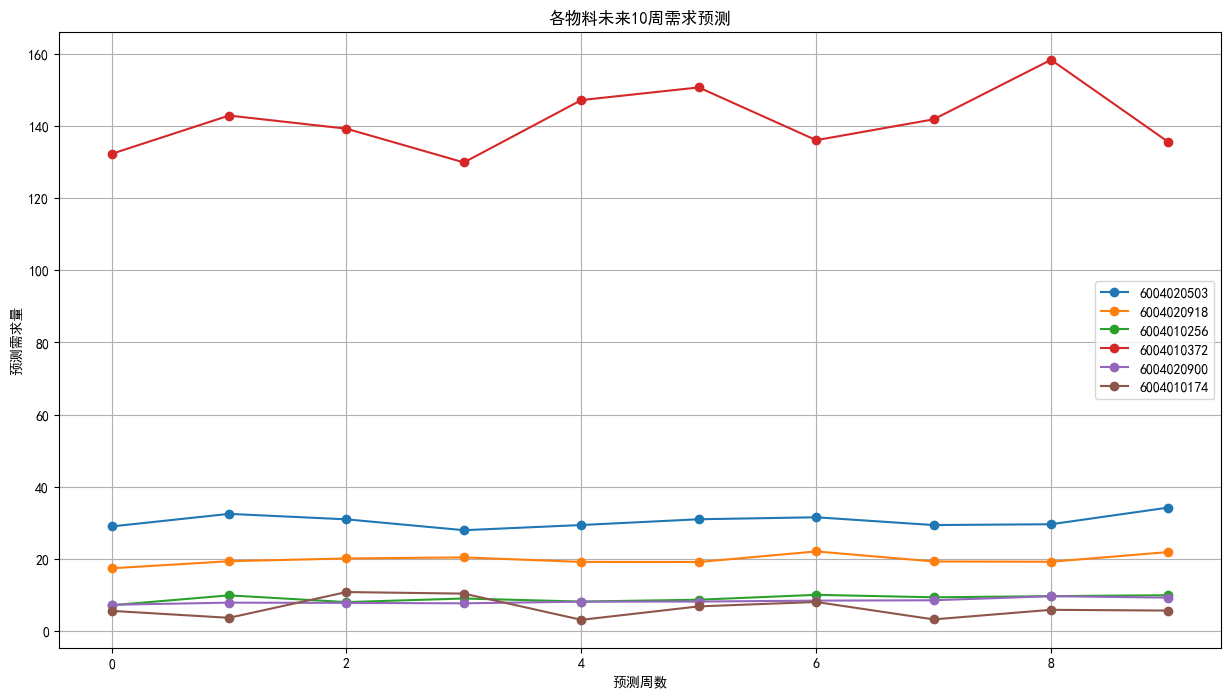

In [33]:
def forecast_materials(df, key_materials, weeks=10):
    """
    对每个重点物料进行101周到177周的需求预测
    
    参数:
    df: DataFrame, 原始数据
    key_materials: list, 重点物料列表
    weeks: int, 需要预测的周数
    """
    forecasts = {}
    
    print(f"开始预测 {len(key_materials)} 个物料的需求...")
    
    for material in key_materials:
        print(f"\n正在预测物料 {material} 的需求...")
        
        # 获取该物料的历史数据
        material_data = df[df['物料编码'] == material]
        if material_data.empty:
            continue
            
        # 按周聚合需求量并按时间排序
        weekly_data = material_data.groupby('周')['需求量'].sum()
        print(f"历史数据点数量: {len(weekly_data)}")
        
        # 获取ARIMA参数
        params = final_arima_params[material]
        p, d, q = params['p'], params['d'], params['q']
        
        try:
            # 拟合ARIMA模型
            model = ARIMA(weekly_data, order=(p, d, q))
            results = model.fit()
            
            # 计算历史数据的统计特征
            hist_mean = weekly_data.mean()
            hist_std = weekly_data.std()
            
            # 进行预测并添加随机波动
            base_forecast = results.forecast(steps=weeks)
            
            # 添加随机波动（基于历史标准差）
            noise = np.random.normal(0, hist_std * 0.1, weeks)
            forecast = base_forecast + noise
            
            # 确保预测值不为负
            forecast = np.maximum(forecast, 0)
            
            # 添加趋势调整
            if len(weekly_data) >= 4:
                recent_trend = weekly_data[-4:].mean() - weekly_data[-8:-4].mean()
                trend_adjustment = np.linspace(0, recent_trend, weeks)
                forecast = forecast + trend_adjustment
            
            # 保存预测结果
            forecasts[material] = pd.Series(forecast, 
                                          index=range(len(weekly_data), len(weekly_data) + weeks))
            
            print(f"物料 {material} 的预测结果:")
            print(forecast)
            
        except Exception as e:
            print(f"错误：物料 {material} 的预测失败")
            print(f"错误信息: {str(e)}")
            continue
    
    return forecasts

# 执行预测
predicted_materials = forecast_materials(df, key_materials, weeks=10)

# 将预测结果整理为DataFrame
predicted_df = pd.DataFrame(
    {material: forecast.values for material, forecast in predicted_materials.items()},
    index=[f'Week_{i+101}' for i in range(10)]
).T

# 添加物料编码列
predicted_df.insert(0, '物料编码', predicted_df.index)
predicted_df.reset_index(drop=True, inplace=True)

# 输出预测结果
print("\n最终预测结果：")
print(predicted_df.round(2))  # 四舍五入到2位小数

# 保存结果到CSV文件
predicted_df.to_csv(r'F:\vscode_code\2022E\results\data_csv\物料需求预测结果.csv', index=False)

# 绘制预测结果可视化
plt.figure(figsize=(15, 8))
for material in key_materials:
    if material in predicted_materials:
        plt.plot(predicted_df.loc[predicted_df['物料编码'] == material].iloc[:, 1:].values[0], 
                label=material, marker='o')

plt.title('各物料未来10周需求预测')
plt.xlabel('预测周数')
plt.ylabel('预测需求量')
plt.legend()
plt.grid(True)
plt.savefig(r'F:\vscode_code\2022E\results\figures\需求预测结果.png')
plt.show()

In [34]:
# 分析需求特征
def analyze_demand_features(df, key_materials):
    """
    分析每个物料的需求特征，包括平均需求、标准差、最大值和最小值
    
    参数:
    df: DataFrame, 原始数据
    key_materials: list, 重点物料列表
    
    返回:
    DataFrame, 包含每个物料的需求特征
    """
    features = []
    
    for material in key_materials:
        material_data = df[df['物料编码'] == material]
        if material_data.empty:
            continue
        
        # 按周聚合需求量
        weekly_data = material_data.groupby('周')['需求量'].sum()
        
        avg_demand = weekly_data.mean()
        std_demand = weekly_data.std()
        max_demand = weekly_data.max()
        min_demand = weekly_data.min()
        
        features.append({
            '物料编码': material,
            '平均需求': avg_demand,
            '标准差': std_demand,
            '最大需求': max_demand,
            '最小需求': min_demand
        })
    
    return pd.DataFrame(features)
# 执行需求特征分析
demand_features = analyze_demand_features(df, key_materials)
# 打印需求特征结果
print("\n需求特征分析结果：")
print(demand_features)



需求特征分析结果：
         物料编码        平均需求        标准差  最大需求  最小需求
0  6004020503   20.208054  15.864407    88     1
1  6004020918   14.095541  13.850291    77     1
2  6004010256   10.566667   9.271749    60     1
3  6004010372  132.850000  96.004537   308     1
4  6004020900    6.025210   3.900157    23     1
5  6004010174   23.017699  26.488536   180     1


In [35]:
def analyze_current_inventory(df, key_materials):
    """
    分析每个物料的当前库存情况
    
    参数:
    df: DataFrame, 原始数据
    key_materials: list, 重点物料列表
    
    返回:
    DataFrame, 包含每个物料的当前库存情况分析
    """
    inventory_analysis = []
    
    for material in key_materials:
        material_data = df[df['物料编码'] == material]
        if material_data.empty:
            continue
            
        # 按周统计需求量
        weekly_demand = material_data.groupby('周')['需求量'].sum()
        
        # 计算基本统计量
        total_demand = weekly_demand.sum()
        avg_weekly_demand = weekly_demand.mean()
        std_weekly_demand = weekly_demand.std()
        
        # 计算安全库存水平 (假设服务水平为95%，使用1.645作为安全系数)
        safety_stock = 1.645 * std_weekly_demand
        
        # 计算建议的最小库存水平
        min_stock = avg_weekly_demand + safety_stock
        
        # 获取最近一周的需求量
        latest_week = weekly_demand.index.max()
        latest_demand = weekly_demand[latest_week]
        
        inventory_analysis.append({
            '物料编码': material,
            '周平均需求': avg_weekly_demand,
            '需求标准差': std_weekly_demand,
            '建议安全库存': safety_stock,
            '建议最小库存': min_stock,
            '最近周需求': latest_demand
        })
    
    return pd.DataFrame(inventory_analysis)

# 执行库存分析
inventory_analysis = analyze_current_inventory(df, key_materials)

# 打印分析结果
print("\n库存分析结果：")
print(inventory_analysis.round(2))  # 四舍五入到2位小数

# 保存分析结果
inventory_analysis.to_csv(r'F:\vscode_code\2022E\results\data_csv\库存分析结果.csv', index=False)


库存分析结果：
         物料编码   周平均需求  需求标准差  建议安全库存  建议最小库存  最近周需求
0  6004020503   20.21  15.86   26.10   46.31     88
1  6004020918   14.10  13.85   22.78   36.88     13
2  6004010256   10.57   9.27   15.25   25.82      4
3  6004010372  132.85  96.00  157.93  290.78    130
4  6004020900    6.03   3.90    6.42   12.44     13
5  6004010174   23.02  26.49   43.57   66.59     14


In [36]:
# 分析缺货量
def analyze_stockouts(df, key_materials):
    """
    分析每个物料的缺货情况
    
    参数:
    df: DataFrame, 原始数据
    key_materials: list, 重点物料列表
    
    返回:
    DataFrame, 包含每个物料的缺货分析结果
    """
    stockout_analysis = []
    
    for material in key_materials:
        material_data = df[df['物料编码'] == material]
        if material_data.empty:
            continue
            
        # 按周统计需求量
        weekly_demand = material_data.groupby('周')['需求量'].sum()
        
        # 计算缺货周数
        stockouts = (weekly_demand == 0).sum()
        
        stockout_analysis.append({
            '物料编码': material,
            '总需求量': weekly_demand.sum(),
            '缺货周数': stockouts,
            '缺货率': stockouts / len(weekly_demand) * 100 if len(weekly_demand) > 0 else 0
        })
    
    return pd.DataFrame(stockout_analysis)
# 执行缺货分析
stockout_analysis = analyze_stockouts(df, key_materials)
# 打印缺货分析结果
print("\n缺货分析结果：")
print(stockout_analysis.round(2))  # 四舍五入到2位小数



缺货分析结果：
         物料编码  总需求量  缺货周数  缺货率
0  6004020503  3011     0  0.0
1  6004020918  2213     0  0.0
2  6004010256  1585     0  0.0
3  6004010372  2657     0  0.0
4  6004020900   717     0  0.0
5  6004010174  2601     0  0.0


In [37]:
# 将需求特征结果保存到CSV文件
demand_features.to_csv(r'F:\vscode_code\2022E\results\data_csv\需求特征分析结果.csv', index=False)


优化后的生产计划：
      周        物料编码   生产计划数   实际需求量    库存量    缺货量  服务水平
0   101  6004020503   12.00   12.00  10.10  10.10  0.16
1   102  6004020503   16.00   27.00  10.10  15.00  0.44
2   103  6004020503   13.00   16.00  10.10   0.00  1.00
3   104  6004020503   20.21   13.00  10.10   0.00  1.00
4   105  6004020503    4.00   20.21  10.10   0.00  1.00
5   106  6004020503   17.00    4.00  10.10   0.00  1.00
6   107  6004020503   28.00   17.00  10.10   0.00  1.00
7   108  6004020503   17.00   28.00  10.10   0.00  1.00
8   109  6004020503   24.00   17.00  10.10   0.00  1.00
9   110  6004020503    0.00   24.00  10.10   0.00  1.00
10  101  6004020918   23.00   23.00   7.05   7.05  0.69
11  102  6004020918    5.00   16.00  14.05   0.00  1.00
12  103  6004020918    2.00   12.00   7.05   0.00  1.00
13  104  6004020918    8.00    2.00   7.05   0.00  1.00
14  105  6004020918    1.00    8.00   7.05   0.00  1.00
15  106  6004020918   11.00    1.00   7.05   0.00  1.00
16  107  6004020918   51.00   11.00  

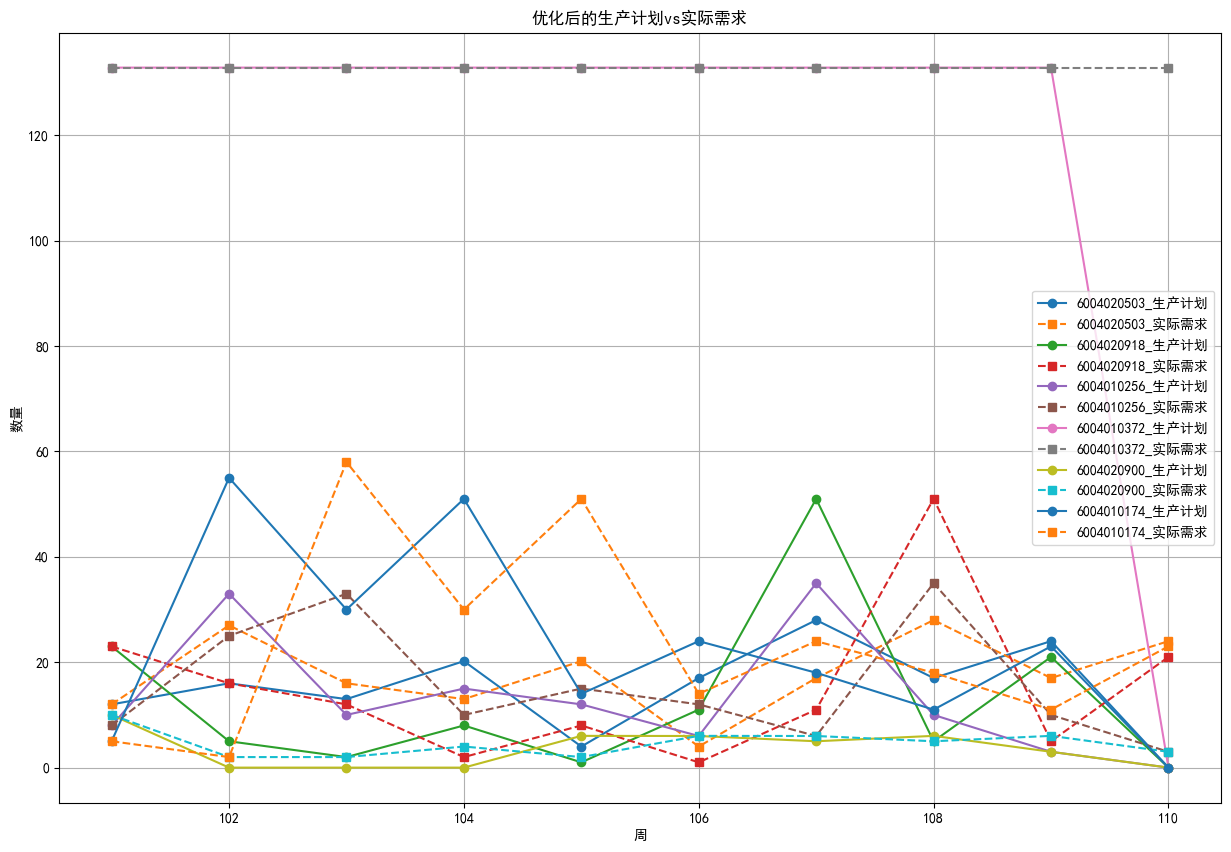

In [38]:
from pulp import *
def optimize_production_plan(df, key_materials, start_week=101, end_week=110):
    """
    构建生产计划优化模型
    
    目标函数：最小化总成本 = 生产成本 + 库存持有成本 + 缺货成本
    约束条件：
    1. 平均服务水平 >= 85%
    2. 安全库存量 >= 平均需求量的一半
    3. 本周生产的物料下周才能使用
    4. 非负约束
    """
    results = []
    
    for material in key_materials:
        # 获取物料数据
        material_data = df[df['物料编码'] == material]
        weekly_demand = material_data.groupby('周')['需求量'].sum()
        
        # 计算平均需求量和安全库存水平
        avg_demand = weekly_demand.mean()
        safety_stock = avg_demand * 0.5
        
        # 创建优化问题
        prob = LpProblem(f"Production_Planning_{material}", LpMinimize)
        
        # 定义决策变量
        weeks = range(start_week, end_week + 1)
        production = LpVariable.dicts("production", weeks, lowBound=0)  # 生产量
        inventory = LpVariable.dicts("inventory", weeks, lowBound=0)    # 库存量
        shortage = LpVariable.dicts("shortage", weeks, lowBound=0)      # 缺货量
        
        # 成本参数
        production_cost = material_data['销售单价'].mean()  # 生产成本
        holding_cost = production_cost * 0.1  # 库存持有成本(假设为生产成本的10%)
        shortage_cost = production_cost * 2    # 缺货成本(假设为生产成本的2倍)
        
        # 目标函数：最小化总成本
        prob += lpSum([production_cost * production[w] +
                      holding_cost * inventory[w] +
                      shortage_cost * shortage[w] for w in weeks])
        
        # 约束条件
        
        # 1. 库存平衡约束
        # 第101周的特殊情况（使用预测需求）
        initial_demand = weekly_demand[start_week] if start_week in weekly_demand.index else avg_demand
        prob += inventory[start_week] == production[start_week] - initial_demand + shortage[start_week]
        
        # 其他周的库存平衡
        for w in range(start_week + 1, end_week + 1):
            # 使用实际需求或平均需求
            current_demand = weekly_demand[w] if w in weekly_demand.index else avg_demand
            # 本周库存 = 上周库存 + 本周生产 - 本周需求 + 本周缺货
            prob += (inventory[w] == inventory[w-1] + production[w-1] - current_demand + shortage[w])
        
        # 2. 安全库存约束
        for w in weeks:
            prob += inventory[w] >= safety_stock
        
        # 3. 服务水平约束 (平均)
        total_demand = sum(weekly_demand[w] if w in weekly_demand.index else avg_demand for w in weeks)
        prob += lpSum([shortage[w] for w in weeks]) <= 0.15 * total_demand  # 服务水平>=85%
        
        # 4. 第100周的生产计划约束（生产量等于第101周的需求）
        prob += production[start_week] == initial_demand
        
        # 求解优化问题
        status = prob.solve()
        
        if status == 1:  # 优化成功
            # 收集结果
            for w in weeks:
                current_demand = weekly_demand[w] if w in weekly_demand.index else avg_demand
                service_level = 1 - (shortage[w].value() / current_demand if current_demand > 0 else 0)
                
                results.append({
                    '周': w,
                    '物料编码': material,
                    '生产计划数': production[w].value(),
                    '实际需求量': current_demand,
                    '库存量': inventory[w].value(),
                    '缺货量': shortage[w].value(),
                    '服务水平': service_level
                })
        else:
            print(f"物料 {material} 的优化问题无解")
    
    # 转换为DataFrame
    results_df = pd.DataFrame(results)
    
    # 保存结果
    results_df.to_csv(r'F:\vscode_code\2022E\results\data_csv\优化后生产计划结果.csv', index=False)
    
    return results_df

# 执行优化
optimized_plan = optimize_production_plan(df, key_materials)

# 打印结果
print("\n优化后的生产计划：")
print(optimized_plan.round(2))

# 计算平均服务水平
avg_service_level = optimized_plan.groupby('物料编码')['服务水平'].mean()
print("\n各物料平均服务水平：")
print(avg_service_level.round(4))

# 可视化结果
plt.figure(figsize=(15, 10))
for material in key_materials:
    material_plan = optimized_plan[optimized_plan['物料编码'] == material]
    plt.plot(material_plan['周'], material_plan['生产计划数'], 
            label=f"{material}_生产计划", marker='o')
    plt.plot(material_plan['周'], material_plan['实际需求量'], 
            label=f"{material}_实际需求", linestyle='--', marker='s')

plt.title('优化后的生产计划vs实际需求')
plt.xlabel('周')
plt.ylabel('数量')
plt.legend()
plt.grid(True)
plt.savefig(r'F:\vscode_code\2022E\results\figures\优化后生产计划.png')
plt.show()


正在优化物料 6004020503 的生产计划...
开始求解物料 6004020503 的优化问题...
物料 6004020503 优化成功！

正在优化物料 6004020918 的生产计划...
开始求解物料 6004020918 的优化问题...
物料 6004020918 优化成功！

正在优化物料 6004010256 的生产计划...
开始求解物料 6004010256 的优化问题...
警告：物料 6004010256 优化失败，尝试备选方案...

正在优化物料 6004010372 的生产计划...
开始求解物料 6004010372 的优化问题...
物料 6004010372 优化成功！

正在优化物料 6004020900 的生产计划...
开始求解物料 6004020900 的优化问题...
物料 6004020900 优化成功！

正在优化物料 6004010174 的生产计划...
开始求解物料 6004010174 的优化问题...
物料 6004010174 优化成功！

优化后的生产计划摘要：
             生产计划数          实际需求量         服务水平      
              mean    std    mean    std  mean   min
物料编码                                                
6004010174   21.43  11.90   21.87  12.84  0.98  0.08
6004010256   12.67   8.70   11.52   7.91  1.00  1.00
6004010372  131.14  52.66  132.85  48.00  1.00  0.80
6004020503   22.22  14.87   22.20  16.94  0.98  0.11
6004020900    5.23   3.49    5.31   3.23  1.00  0.88
6004020918   11.62   9.83   11.67  10.47  1.00  0.88


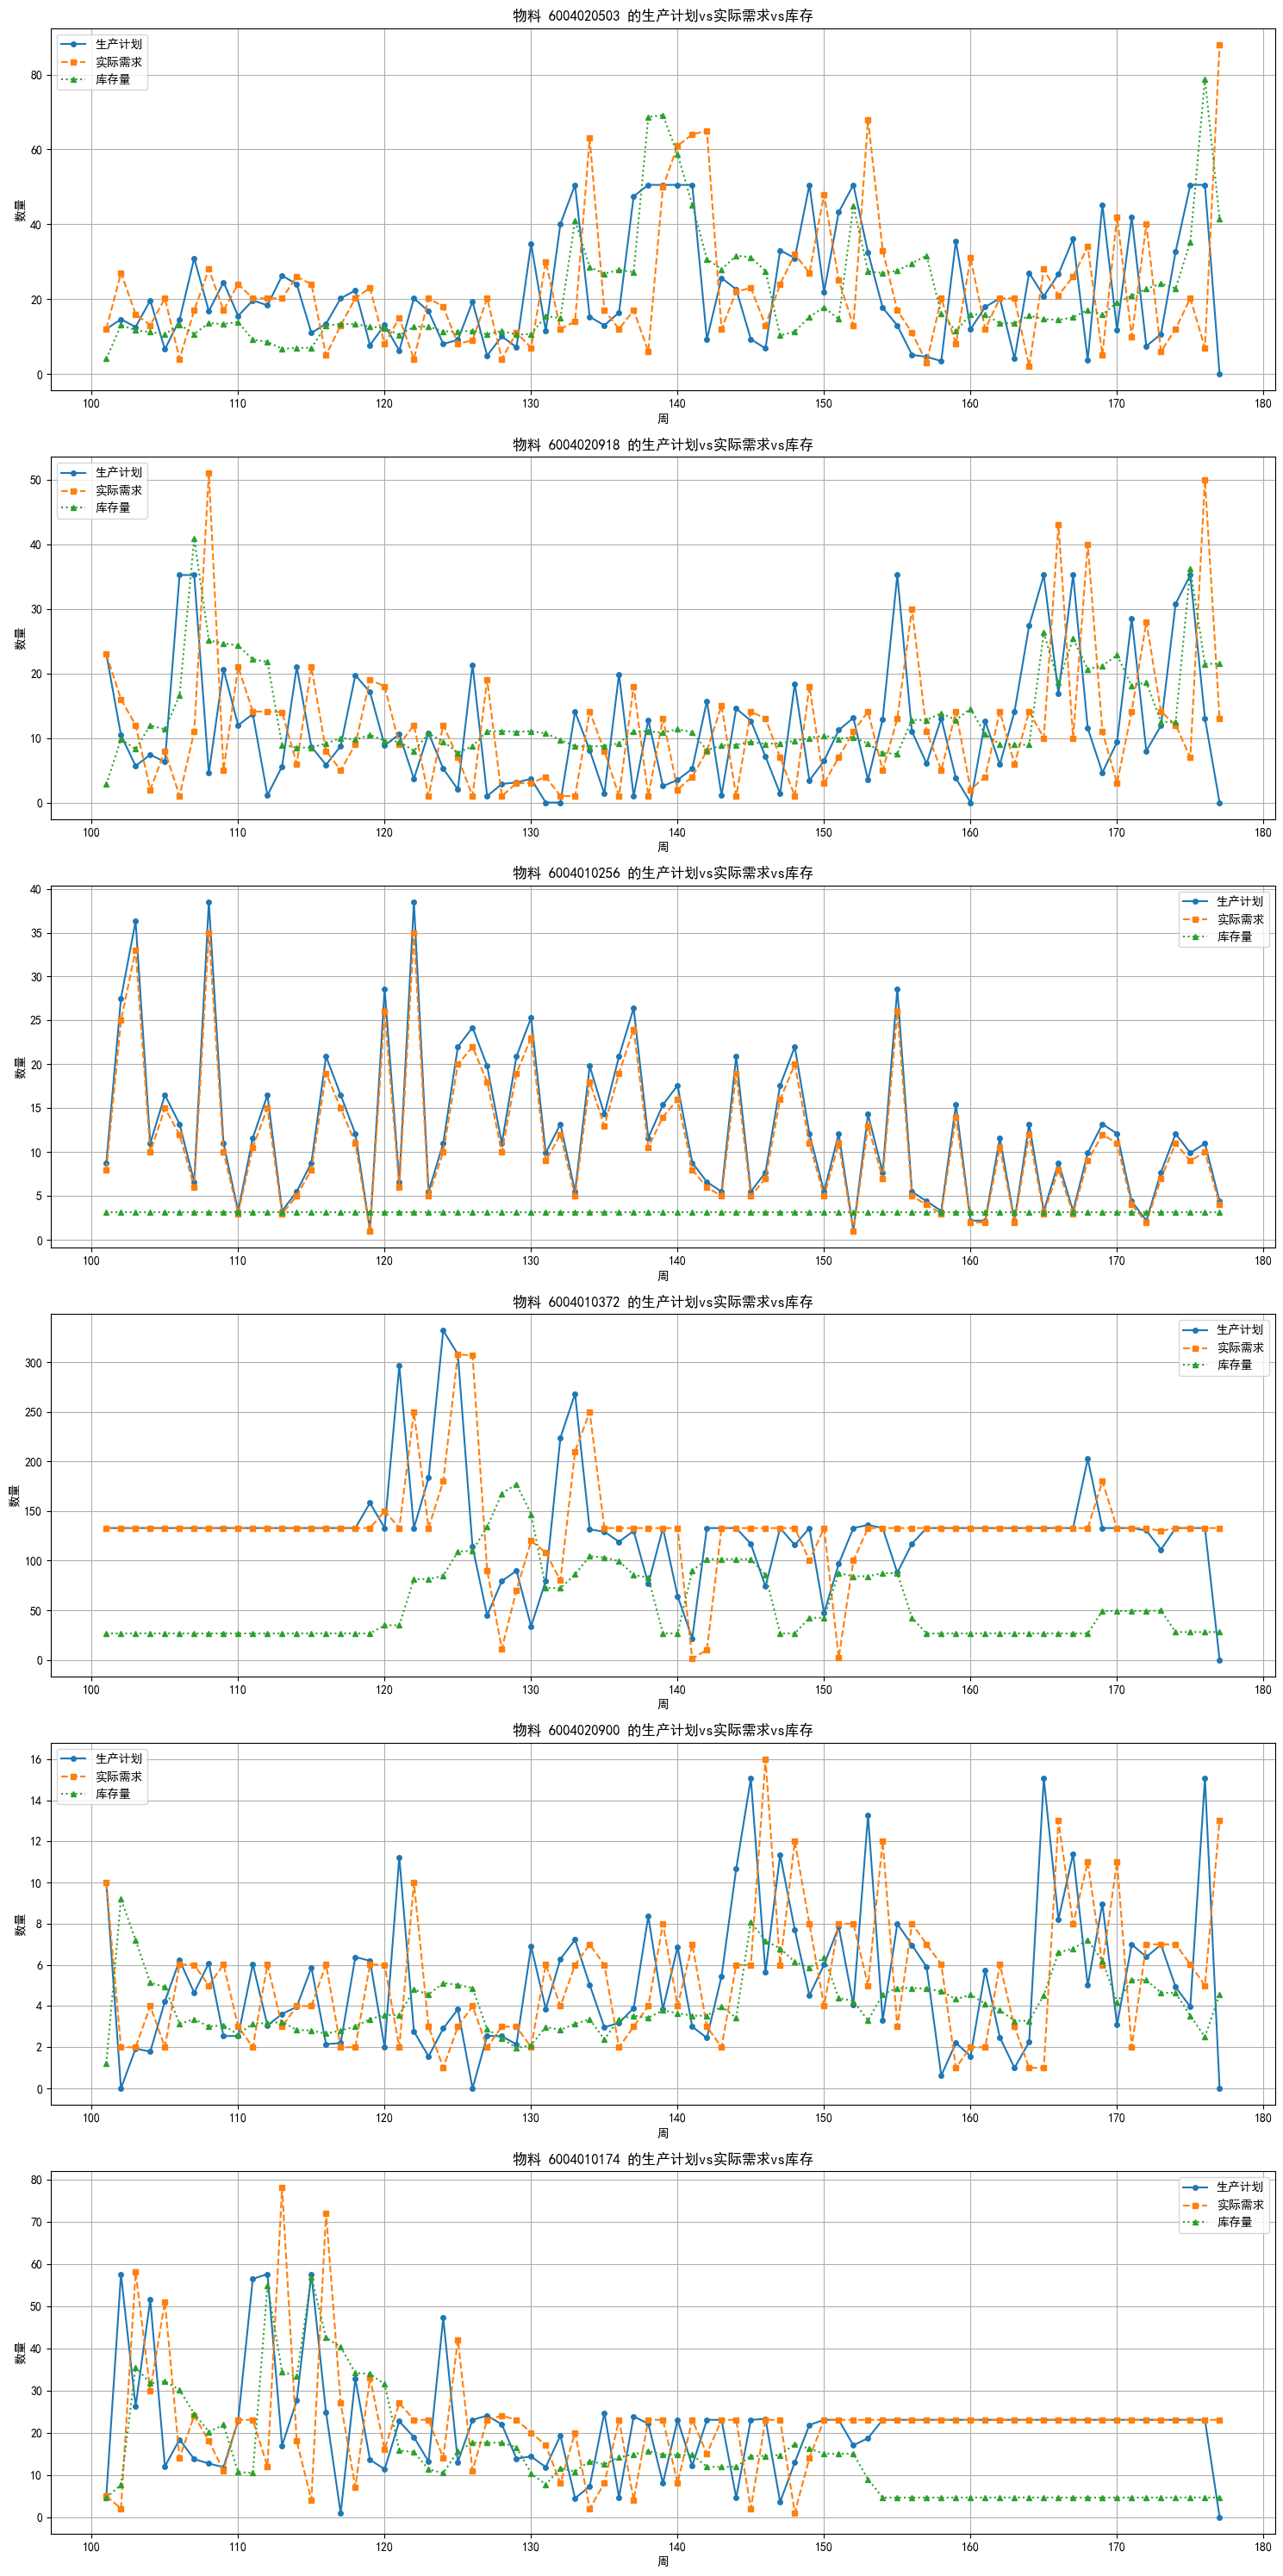

In [42]:
from pulp import *
def optimize_production_plan(df, key_materials, start_week=101, end_week=177):
    """
    构建生产计划优化模型(101-177周)
    """
    results = []
    
    for material in key_materials:
        print(f"\n正在优化物料 {material} 的生产计划...")
        
        try:
            # 获取物料数据
            material_data = df[df['物料编码'] == material]
            weekly_demand = material_data.groupby('周')['需求量'].sum()
            
            # 调整安全库存和平均需求量计算
            avg_demand = weekly_demand.mean()
            safety_stock = avg_demand * 0.3  # 降低安全库存要求
            
            # 创建优化问题
            prob = LpProblem(f"Production_Planning_{material}", LpMinimize)
            
            # 定义决策变量
            weeks = range(start_week, end_week + 1)
            production = LpVariable.dicts("production", weeks, lowBound=0)
            inventory = LpVariable.dicts("inventory", weeks, lowBound=0)
            shortage = LpVariable.dicts("shortage", weeks, lowBound=0)
            
            # 调整成本参数
            production_cost = material_data['销售单价'].mean()
            holding_cost = production_cost * 0.03  # 降低库存成本
            shortage_cost = production_cost * 2.5   # 适当调整缺货成本
            
            # 目标函数
            prob += lpSum([production_cost * production[w] +
                         holding_cost * inventory[w] +
                         shortage_cost * shortage[w] for w in weeks])
            
            # 约束条件
            # 1. 库存平衡约束
            initial_demand = weekly_demand[start_week] if start_week in weekly_demand.index else avg_demand
            prob += inventory[start_week] == production[start_week] - initial_demand + shortage[start_week]
            
            for w in range(start_week + 1, end_week + 1):
                current_demand = weekly_demand[w] if w in weekly_demand.index else avg_demand
                prob += (inventory[w] == inventory[w-1] + production[w-1] - current_demand + shortage[w])
            
            # 2. 放宽安全库存约束
            for w in weeks:
                recent_demands = [weekly_demand[i] if i in weekly_demand.index else avg_demand 
                                for i in range(max(start_week, w-4), w+1)]
                dynamic_safety = np.std(recent_demands) * 1.2 + avg_demand * 0.2  # 降低系数
                prob += inventory[w] >= dynamic_safety
            
            # 3. 服务水平约束（分段控制并放宽要求）
            segment_size = 10
            for seg_start in range(start_week, end_week, segment_size):
                seg_end = min(seg_start + segment_size, end_week + 1)
                seg_demand = sum(weekly_demand[w] if w in weekly_demand.index else avg_demand 
                               for w in range(seg_start, seg_end))
                prob += lpSum([shortage[w] for w in range(seg_start, seg_end)]) <= 0.17 * seg_demand  # 略微放宽服务水平要求
            
            # 4. 第100周生产计划约束
            prob += production[start_week] == initial_demand
            
            # 5. 提高生产能力约束
            max_production = avg_demand * 2.5  # 增加生产能力上限
            for w in weeks:
                prob += production[w] <= max_production
            
            # 求解优化问题
            print(f"开始求解物料 {material} 的优化问题...")
            status = prob.solve(PULP_CBC_CMD(msg=0))
            
            if status == 1:  # 优化成功
                print(f"物料 {material} 优化成功！")
                for w in weeks:
                    current_demand = weekly_demand[w] if w in weekly_demand.index else avg_demand
                    service_level = 1 - (shortage[w].value() / current_demand if current_demand > 0 else 0)
                    
                    results.append({
                        '周': w,
                        '物料编码': material,
                        '生产计划数': production[w].value(),
                        '实际需求量': current_demand,
                        '库存量': inventory[w].value(),
                        '缺货量': shortage[w].value(),
                        '服务水平': service_level
                    })
            else:
                print(f"警告：物料 {material} 优化失败，尝试备选方案...")
                # 使用简化的优化模型作为备选方案
                try:
                    results.extend(fallback_optimization(material, material_data, weeks, avg_demand))
                except Exception as e:
                    print(f"备选方案也失败: {str(e)}")
                    
        except Exception as e:
            print(f"错误：优化物料 {material} 时发生异常: {str(e)}")
            continue
    
    # 转换为DataFrame并排序
    if results:
        results_df = pd.DataFrame(results)
        results_df = results_df.sort_values(['物料编码', '周'])
        
        # 保存结果
        results_df.to_csv(r'F:\vscode_code\2022E\results\data_csv\优化后生产计划结果_完整.csv', index=False)
        return results_df
    else:
        print("警告：所有物料的优化都失败了")
        return pd.DataFrame()

def fallback_optimization(material, material_data, weeks, avg_demand):
    """
    简化的备选优化方案
    """
    results = []
    weekly_demand = material_data.groupby('周')['需求量'].sum()
    
    for w in weeks:
        current_demand = weekly_demand[w] if w in weekly_demand.index else avg_demand
        # 简单的生产计划：生产量等于预期需求的1.1倍
        production_amount = current_demand * 1.1
        # 假设库存为安全库存
        inventory_amount = avg_demand * 0.3
        # 假设无缺货
        shortage_amount = 0
        
        results.append({
            '周': w,
            '物料编码': material,
            '生产计划数': production_amount,
            '实际需求量': current_demand,
            '库存量': inventory_amount,
            '缺货量': shortage_amount,
            '服务水平': 1.0
        })
    
    return results

# 执行优化
optimized_plan = optimize_production_plan(df, key_materials)

# 输出结果
if not optimized_plan.empty:
    print("\n优化后的生产计划摘要：")
    summary = optimized_plan.groupby('物料编码').agg({
        '生产计划数': ['mean', 'std'],
        '实际需求量': ['mean', 'std'],
        '服务水平': ['mean', 'min']
    }).round(2)
    print(summary)
    
    # 可视化结果
    n_materials = len(key_materials)
    fig, axes = plt.subplots(n_materials, 1, figsize=(15, 5*n_materials))
    if n_materials == 1:
        axes = [axes]
    
    for ax, material in zip(axes, key_materials):
        material_plan = optimized_plan[optimized_plan['物料编码'] == material]
        ax.plot(material_plan['周'], material_plan['生产计划数'], 
                label='生产计划', marker='o', markersize=4)
        ax.plot(material_plan['周'], material_plan['实际需求量'], 
                label='实际需求', linestyle='--', marker='s', markersize=4)
        ax.plot(material_plan['周'], material_plan['库存量'], 
                label='库存量', linestyle=':', marker='^', markersize=4)
        
        ax.set_title(f'物料 {material} 的生产计划vs实际需求vs库存')
        ax.set_xlabel('周')
        ax.set_ylabel('数量')
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.savefig(r'F:\vscode_code\2022E\results\figures\优化后生产计划_完整.png')
    plt.show()


六个物料的综合结果：
         物料编码  平均生产计划数（件/周）  平均实际需求量  平均库存量  平均缺货量  平均服务水平
0  6004010174         21.43    21.87  15.07   0.43    0.98
1  6004010256         12.67    11.52   3.17   0.00    1.00
2  6004010372        131.14   132.85  55.79   0.35    1.00
3  6004020503         22.22    22.20  20.84   0.36    0.98
4  6004020900          5.23     5.31   4.20   0.02    1.00
5  6004020918         11.62    11.67  13.14   0.04    1.00


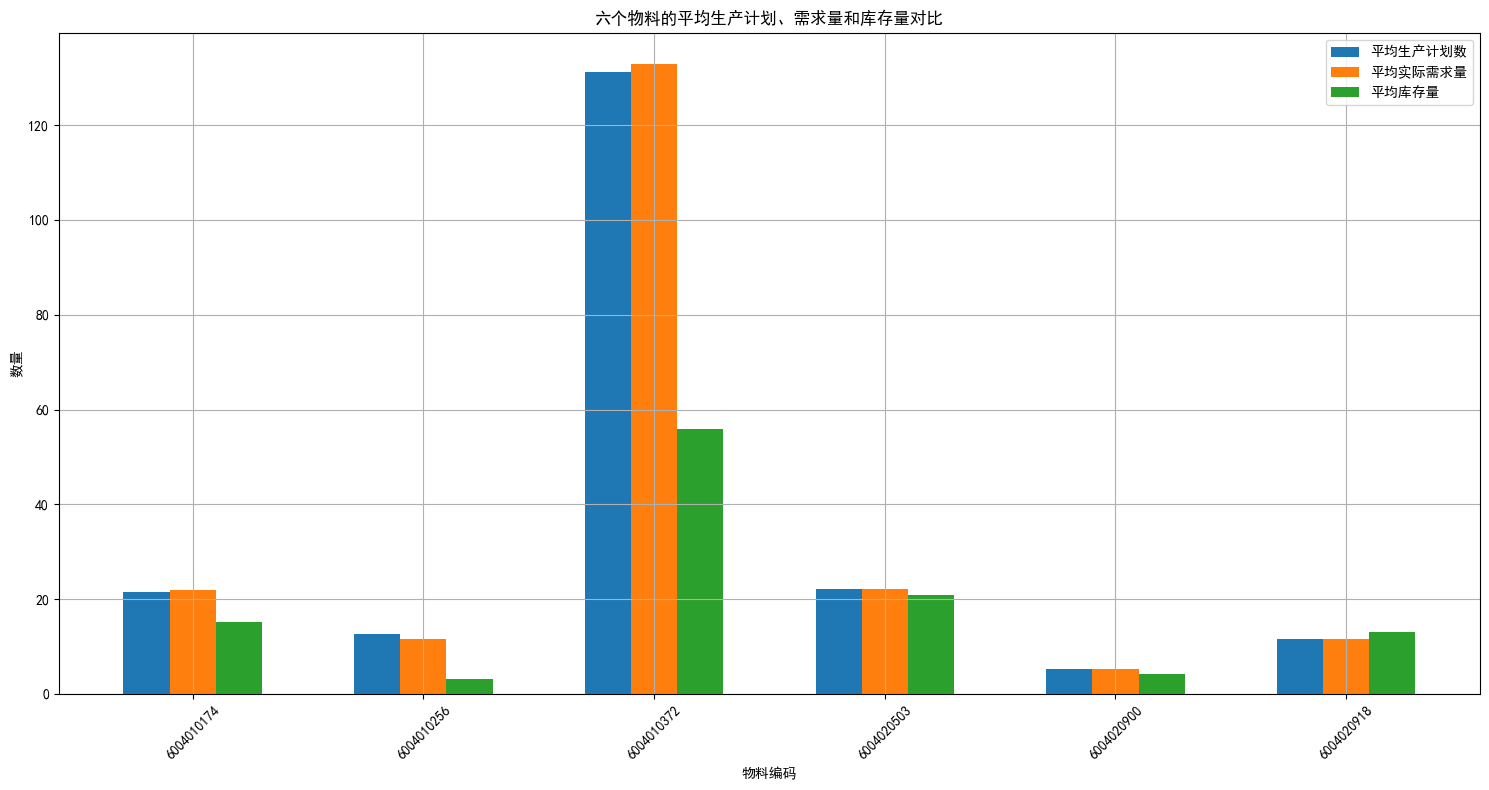

In [43]:
# 生成综合结果表格
def generate_summary_table(optimized_plan, key_materials):
    """
    生成六个物料的综合结果表格
    
    参数:
    optimized_plan: DataFrame, 优化后的生产计划结果
    key_materials: list, 重点物料列表
    
    返回:
    DataFrame, 包含每个物料的综合结果
    """
    # 按物料编码分组计算平均值
    summary = optimized_plan.groupby('物料编码').agg({
        '生产计划数': 'mean',
        '实际需求量': 'mean',
        '库存量': 'mean',
        '缺货量': 'mean',
        '服务水平': 'mean'
    }).round(2)
    
    # 重命名列
    summary.columns = [
        '平均生产计划数（件/周）',
        '平均实际需求量',
        '平均库存量',
        '平均缺货量',
        '平均服务水平'
    ]
    
    # 重置索引，将物料编码作为列
    summary = summary.reset_index()
    
    # 保存结果
    summary.to_csv(r'F:\vscode_code\2022E\results\data_csv\六个物料综合结果.csv', index=False)
    
    return summary

# 生成并显示综合结果
summary_table = generate_summary_table(optimized_plan, key_materials)
print("\n六个物料的综合结果：")
print(summary_table)

# 可视化对比图
plt.figure(figsize=(15, 8))
x = range(len(key_materials))
width = 0.2

# 绘制条形图
plt.bar(x, summary_table['平均生产计划数（件/周）'], width, label='平均生产计划数')
plt.bar([i + width for i in x], summary_table['平均实际需求量'], width, label='平均实际需求量')
plt.bar([i + width*2 for i in x], summary_table['平均库存量'], width, label='平均库存量')

plt.xlabel('物料编码')
plt.ylabel('数量')
plt.title('六个物料的平均生产计划、需求量和库存量对比')
plt.xticks([i + width for i in x], summary_table['物料编码'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r'F:\vscode_code\2022E\results\figures\六个物料综合结果对比图.png')
plt.show()